# Traemos la data del DOWJONES

In [1]:
import pandas as pd
import pandas_datareader.data as reader
import requests
import datetime as dt
import numpy as np
from scipy.stats import percentileofscore as score
from statistics import mean
from math import floor
import html5lib
import lxml
from bs4 import BeautifulSoup

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import yfinance as yf
import datetime
import time

# GS,HD, DE, AMXL.MX

style.use('seaborn')

# importamos la data del DJ
# tickers = ['CVX', 'GS', 'HD', 'MSFT','DE', 'BBQ', 'NMRK', 'ALSEA.MX', 'AC.MX', 'AMXL.MX', 'BIMBOA.MX', 'BBAJIOO.MX', 'BA','MFRISCOA-1.MX','BAX','CNP']
# ticker = 'CVX', 'GS', 'HD', 'MSFT','DE', 'BBQ', 'NMRK', 'ALSEA.MX', 'AC.MX', 'AMXL.MX', 'BIMBOA.MX', 'BBAJIOO.MX', 'BA','MFRISCOA-1.MX','BAX','CNP'
assets = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO',
          'KO', 'DOW', 'GS', 'HD', 'HON','INTC', 'IBM', 'JNJ', 'JPM',
          'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ','V','WBA','WMT','DIS']

start = '2021-12-31'
end = datetime.datetime.now().date().isoformat()         # today
dfdowj = yf.download(' '.join(assets), start, end)['Adj Close']
returns_df2 = dfdowj.pct_change()[1:]

[*********************100%***********************]  30 of 30 completed


In [4]:
tickers2=assets
tickers2

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DOW',
 'GS',
 'HD',
 'HON',
 'INTC',
 'IBM',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS']

In [12]:
dfdowj.head()

AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2021-12-31  176.276230  216.175354  160.947388  201.320007  201.033142   
2022-01-03  180.683868  217.828110  165.482651  207.860001  201.285950   
2022-01-04  178.390686  218.933151  170.795090  213.630005  212.060089   
2022-01-05  173.645523  216.338699  168.975082  213.070007  213.684006   
2022-01-06  170.746811  216.367523  170.523499  211.339996  215.862183   

                   CRM       CSCO         CVX         DIS        DOW  ...  \
Date                                                                  ...   
2021-12-31  254.130005  60.954411  112.277252  154.889999  53.977470  ...   
2022-01-03  255.460007  60.752419  114.104698  156.759995  54.120220  ...   
2022-01-04  248.229996  59.262394  116.180885  155.729996  55.585762  ...   
2022-01-05  227.669998  58.323868  116.936729  155.190002  55.528656  ...   
2022-01-06  229.149994  58.943100  117.931778  156.899994  55.423981  ...   

                  MRK        MSFT         NKE          PG         TRV  \
Date                                                                    
2021-12-31  74.253090  332.365417  164.898331  158.622086  153.151535   
2022-01-03  74.475937  330.813873  162.919571  157.962677  152.485794   
2022-01-04  74.611572  325.141357  164.621292  158.515427  155.667694   
2022-01-05  76.423332  312.659882  160.525299  159.232986  156.421555   
2022-01-06  76.374886  310.189240  159.328156  157.894806  158.927902   

                   UNH           V         VZ        WBA         WMT  
Date                                                                  
2021-12-31  495.790558  214.662567  48.500851  49.202332  142.450775  
2022-01-03  495.928802  219.337967  48.948891  50.051304  142.411392  
2022-01-04  484.692657  220.358261  49.910320  50.447487  139.802414  
2022-01-05  483.497986  217.921494  50.423710  50.937996  141.692688  
2022-01-06  463.711365  217.673859  50.181011  49.466461  141.298904  

[5 rows x 30 columns]

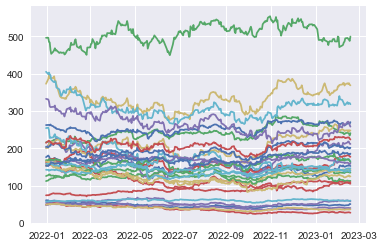

In [13]:
plt.figure()
plt.plot(dfdowj)
plt.show()

In [14]:
df_week2 = dfdowj.groupby(pd.PeriodIndex(dfdowj.index, freq='W')).mean()
#df_week = df_week[['Adj Close']]
df_week2.head()

AAPL        AMGN         AXP          BA  \
Date                                                                    
2021-12-27/2022-01-02  176.276230  216.175354  160.947388  201.320007   
2022-01-03/2022-01-09  174.876486  217.574429  169.551898  212.280002   
2022-01-10/2022-01-16  172.347070  223.068900  170.677359  218.528000   
2022-01-17/2022-01-23  164.529942  221.429104  159.581005  215.430000   
2022-01-24/2022-01-30  160.946729  216.550107  168.909995  196.578003   

                              CAT         CRM       CSCO         CVX  \
Date                                                                   
2021-12-27/2022-01-02  201.033142  254.130005  60.954411  112.277252   
2022-01-03/2022-01-09  212.178732  237.763998  59.285614  116.955872   
2022-01-10/2022-01-16  217.803058  232.432001  59.827443  121.733998   
2022-01-17/2022-01-23  215.243599  223.475002  56.454082  122.861555   
2022-01-24/2022-01-30  206.417325  216.858002  53.906041  125.995461   

                              DIS        DOW  ...        MRK        MSFT  \
Date                                          ...                          
2021-12-27/2022-01-02  154.889999  53.977470  ...  74.253090  332.365417   
2022-01-03/2022-01-09  156.481998  55.380202  ...  75.936967  317.830347   
2022-01-10/2022-01-16  155.934003  56.626861  ...  79.046991  308.829437   
2022-01-17/2022-01-23  146.845001  55.807015  ...  78.370731  297.364349   
2022-01-24/2022-01-30  136.324002  55.431593  ...  77.297235  294.430768   

                              NKE          PG         TRV         UNH  \
Date                                                                    
2021-12-27/2022-01-02  164.898331  158.622086  153.151535  495.790558   
2022-01-03/2022-01-09  160.539151  158.282687  157.251779  476.126385   
2022-01-10/2022-01-16  148.548001  154.431073  159.867776  462.840521   
2022-01-17/2022-01-23  142.899677  156.387608  159.444336  456.079132   
2022-01-24/2022-01-30  143.660513  155.719229  164.042407  455.210248   

                                V         VZ        WBA         WMT  
Date                                                                 
2021-12-27/2022-01-02  214.662567  48.500851  49.202332  142.450775  
2022-01-03/2022-01-09  218.040356  50.140597  50.338065  141.570615  
2022-01-10/2022-01-16  212.320914  50.579666  51.024783  142.318851  
2022-01-17/2022-01-23  210.658264  50.419546  50.166855  139.770412  
2022-01-24/2022-01-30  206.801547  49.306248  47.842102  135.167258  

[5 rows x 30 columns]

In [15]:
l2=len(df_week2.columns)
l2

30

AAPL        AMGN         AXP          BA  \
Date                                                                    
2022-07-25/2022-07-31  155.527423  243.998785  151.178879  157.409998   
2022-08-01/2022-08-07  163.060840  240.309894  153.825568  166.106000   
2022-08-08/2022-08-14  167.390326  243.154715  160.300320  167.526004   
2022-08-15/2022-08-21  172.737274  246.415866  163.117764  168.272000   
2022-08-22/2022-08-28  166.664633  240.643698  157.590103  163.312003   

                              CAT         CRM       CSCO         CVX  \
Date                                                                   
2022-07-25/2022-07-31  184.752783  178.672000  43.996536  148.015137   
2022-08-01/2022-08-07  183.940118  187.571997  44.488007  152.023398   
2022-08-08/2022-08-14  188.513556  187.444000  44.914606  152.865610   
2022-08-15/2022-08-21  194.237781  188.062000  46.805788  154.112863   
2022-08-22/2022-08-28  192.572916  174.425998  46.267134  159.369446   

                              DIS        DOW  ...  week MRK  week MSFT  \
Date                                          ...                        
2022-07-25/2022-07-31  103.394000  50.727511  ... -0.005006   0.026819   
2022-08-01/2022-08-07  106.939999  50.211732  ... -0.032216   0.047656   
2022-08-08/2022-08-14  113.786000  52.570698  ...  0.020698   0.020371   
2022-08-15/2022-08-21  122.967999  54.190054  ...  0.018963   0.017290   
2022-08-22/2022-08-28  115.748001  53.425140  ... -0.010611  -0.053491   

                       week NKE   week PG  week TRV  week UNH    week V  \
Date                                                                      
2022-07-25/2022-07-31  0.008241  0.015301  0.011970  0.023923 -0.003238   
2022-08-01/2022-08-07  0.034362 -0.002458 -0.008192  0.000298 -0.004962   
2022-08-08/2022-08-14 -0.002253  0.012891  0.050158  0.002921  0.003215   
2022-08-15/2022-08-21  0.022945  0.025481  0.044984  0.015196  0.017987   
2022-08-22/2022-08-28 -0.047006 -0.023890 -0.028864 -0.015378 -0.039191   

                        week VZ  week WBA  week WMT  
Date                                                 
2022-07-25/2022-07-31 -0.066572  0.015019 -0.017499  
2022-08-01/2022-08-07 -0.000088  0.001122  0.008494  
2022-08-08/2022-08-14 -0.010304  0.015534  0.001436  
2022-08-15/2022-08-21  0.005876  0.010879  0.062398  
2022-08-22/2022-08-28 -0.032157 -0.076551 -0.024394  

[5 rows x 60 columns]

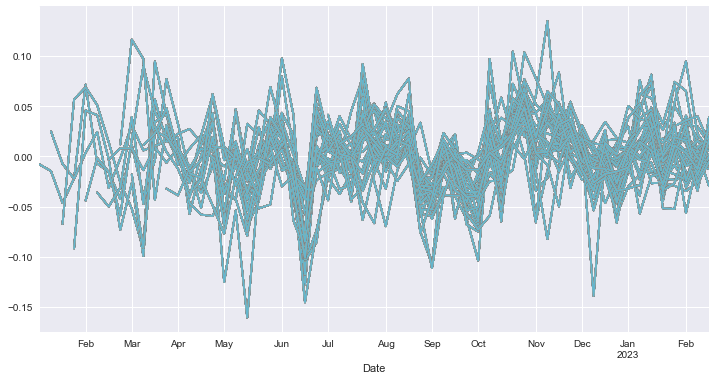

In [16]:
for i in range(len(df_week2.columns)):
    idem2=df_week2.columns.__getitem__(i)
    x2='week {}'.format(idem2)
    df_week2[x2]=np.log(df_week2.iloc[:,i]).diff()
    # drop null rows
    df_week2.dropna(inplace=True)
    for m in range(l2):
        df_week2[x2].plot(kind='line', figsize=(12, 6));
df_week2.head()

In [17]:
udiff2=df_week2.iloc[:, 30:]
udiff2.head()

week AAPL  week AMGN  week AXP   week BA  week CAT  \
Date                                                                        
2022-07-25/2022-07-31   0.026789   0.015559  0.025513  0.006693  0.047135   
2022-08-01/2022-08-07   0.047301  -0.015234  0.017356  0.053772 -0.004408   
2022-08-08/2022-08-14   0.026205   0.011769  0.041230  0.008512  0.024560   
2022-08-15/2022-08-21   0.031443   0.013323  0.017423  0.004443  0.029913   
2022-08-22/2022-08-28  -0.035788  -0.023703 -0.034475 -0.029919 -0.008608   

                       week CRM  week CSCO  week CVX  week DIS  week DOW  ...  \
Date                                                                      ...   
2022-07-25/2022-07-31  0.001557   0.018035  0.052637  0.022318  0.011228  ...   
2022-08-01/2022-08-07  0.048611   0.011109  0.026720  0.033721 -0.010220  ...   
2022-08-08/2022-08-14 -0.000683   0.009543  0.005525  0.062052  0.045910  ...   
2022-08-15/2022-08-21  0.003292   0.041244  0.008126  0.077605  0.030339  ...   
2022-08-22/2022-08-28 -0.075271  -0.011575  0.033540 -0.060509 -0.014216  ...   

                       week MRK  week MSFT  week NKE   week PG  week TRV  \
Date                                                                       
2022-07-25/2022-07-31 -0.005006   0.026819  0.008241  0.015301  0.011970   
2022-08-01/2022-08-07 -0.032216   0.047656  0.034362 -0.002458 -0.008192   
2022-08-08/2022-08-14  0.020698   0.020371 -0.002253  0.012891  0.050158   
2022-08-15/2022-08-21  0.018963   0.017290  0.022945  0.025481  0.044984   
2022-08-22/2022-08-28 -0.010611  -0.053491 -0.047006 -0.023890 -0.028864   

                       week UNH    week V   week VZ  week WBA  week WMT  
Date                                                                     
2022-07-25/2022-07-31  0.023923 -0.003238 -0.066572  0.015019 -0.017499  
2022-08-01/2022-08-07  0.000298 -0.004962 -0.000088  0.001122  0.008494  
2022-08-08/2022-08-14  0.002921  0.003215 -0.010304  0.015534  0.001436  
2022-08-15/2022-08-21  0.015196  0.017987  0.005876  0.010879  0.062398  
2022-08-22/2022-08-28 -0.015378 -0.039191 -0.032157 -0.076551 -0.024394  

[5 rows x 30 columns]

In [18]:
udiff2.index=udiff2.index.astype(str)
udiff2.index.dtype

dtype('O')

# Generaremos una prueba de estacionaridad de las primeras diferencias

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
rolmean2 = udiff2.rolling(20).mean()
rolstd2 = udiff2.rolling(20).std()
print(rolmean2)

                       week AAPL  week AMGN  week AXP   week BA  week CAT  \
Date                                                                        
2022-07-25/2022-07-31        NaN        NaN       NaN       NaN       NaN   
2022-08-01/2022-08-07        NaN        NaN       NaN       NaN       NaN   
2022-08-08/2022-08-14        NaN        NaN       NaN       NaN       NaN   
2022-08-15/2022-08-21        NaN        NaN       NaN       NaN       NaN   
2022-08-22/2022-08-28        NaN        NaN       NaN       NaN       NaN   
2022-08-29/2022-09-04        NaN        NaN       NaN       NaN       NaN   
2022-09-05/2022-09-11        NaN        NaN       NaN       NaN       NaN   
2022-09-12/2022-09-18        NaN        NaN       NaN       NaN       NaN   
2022-09-19/2022-09-25        NaN        NaN       NaN       NaN       NaN   
2022-09-26/2022-10-02        NaN        NaN       NaN       NaN       NaN   
2022-10-03/2022-10-09        NaN        NaN       NaN       NaN       NaN   

week AAPL


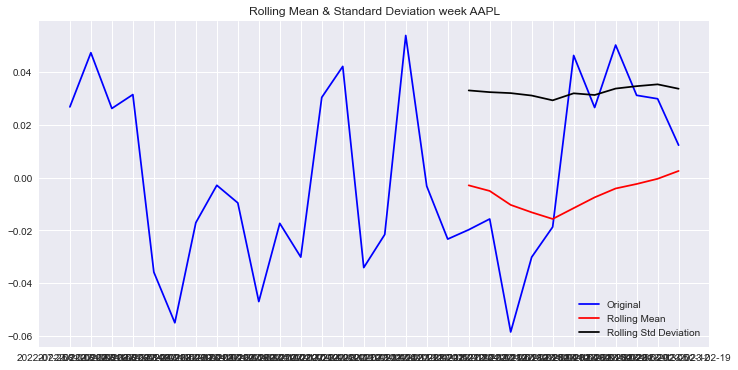

Test Statistic                 -3.348199
p-value                         0.012857
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


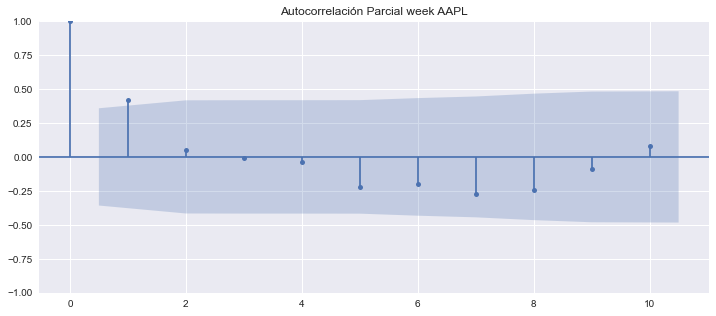

week AMGN


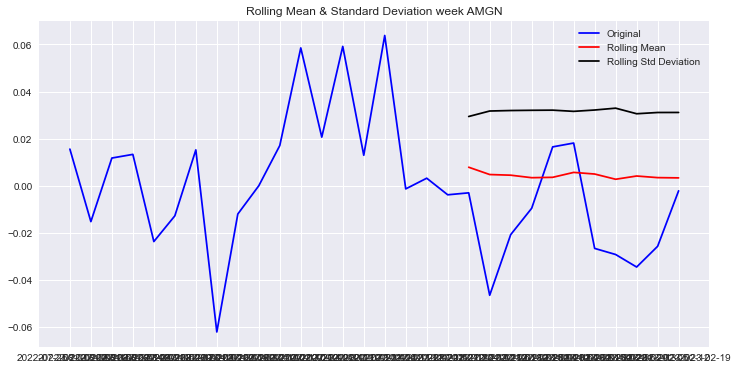

Test Statistic                 -2.092838
p-value                         0.247404
#Lags Used                      2.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


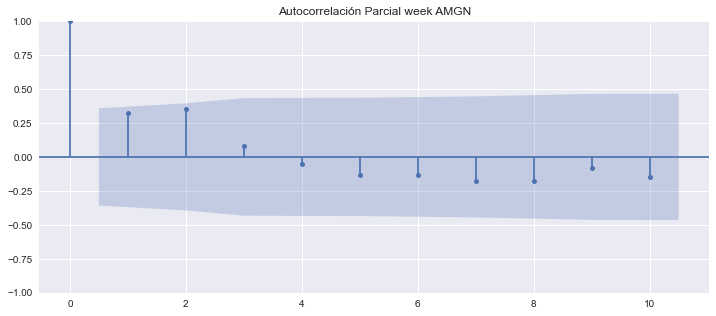

week AXP


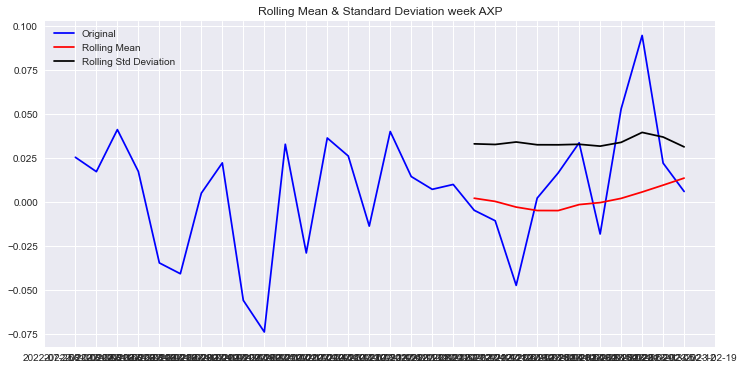

Test Statistic                 -4.244688
p-value                         0.000553
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


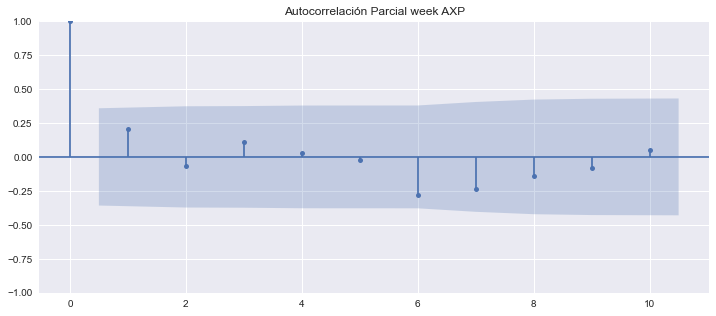

week BA


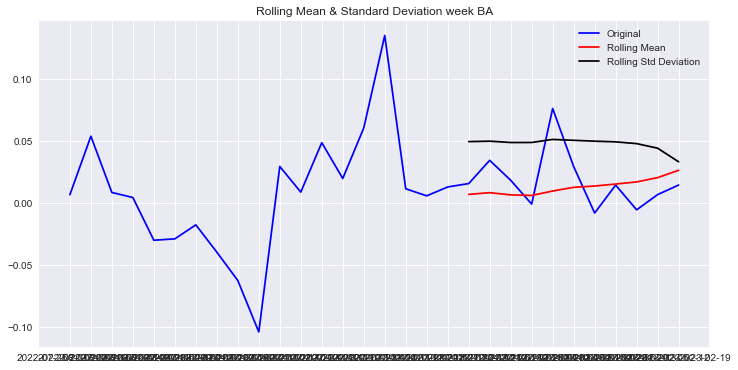

Test Statistic                 -3.628340
p-value                         0.005242
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


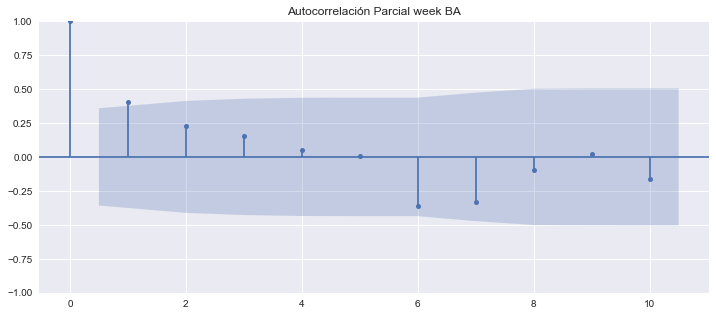

week CAT


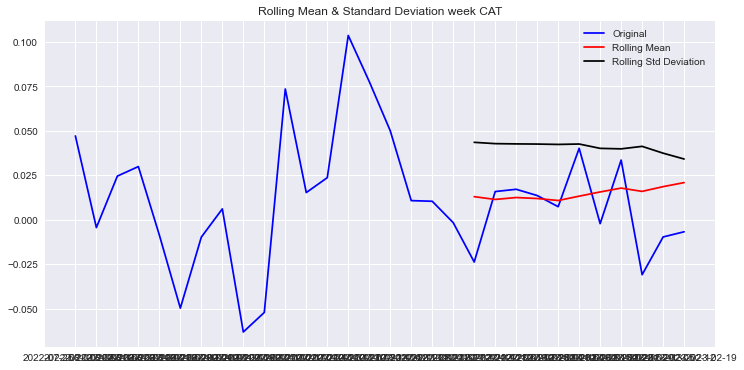

Test Statistic                 -3.358645
p-value                         0.012452
#Lags Used                      5.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


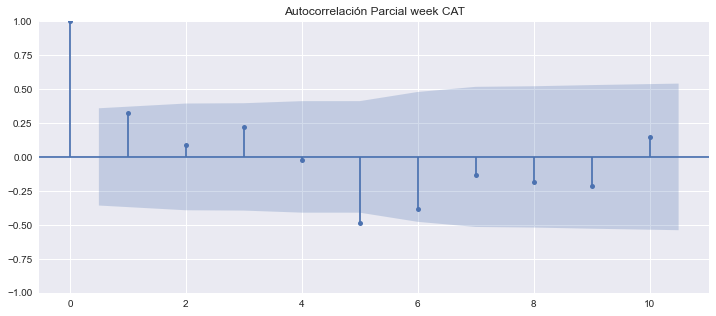

week CRM


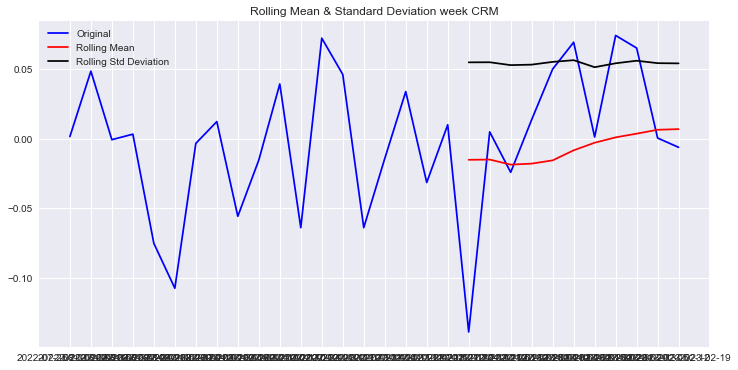

Test Statistic                 -4.779489
p-value                         0.000060
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


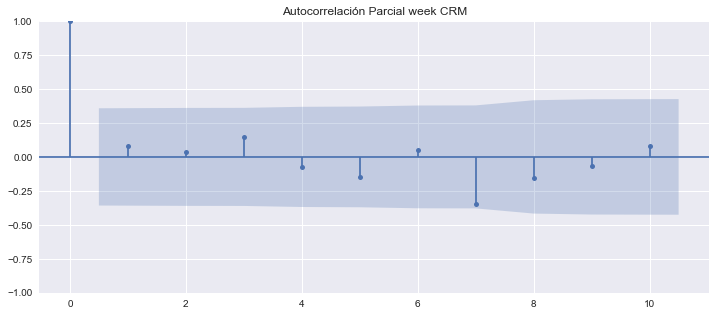

week CSCO


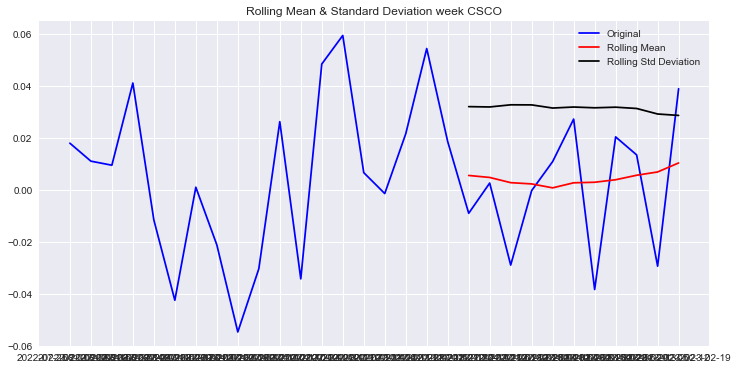

Test Statistic                 -4.663020
p-value                         0.000099
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


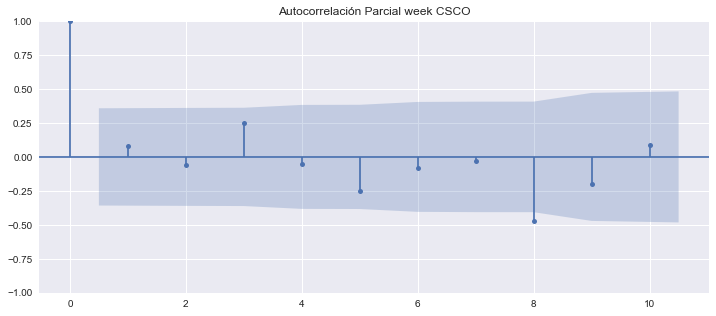

week CVX


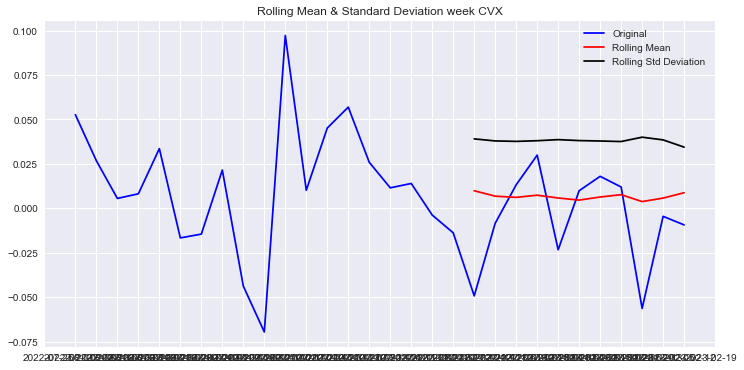

Test Statistic                 -5.029914
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


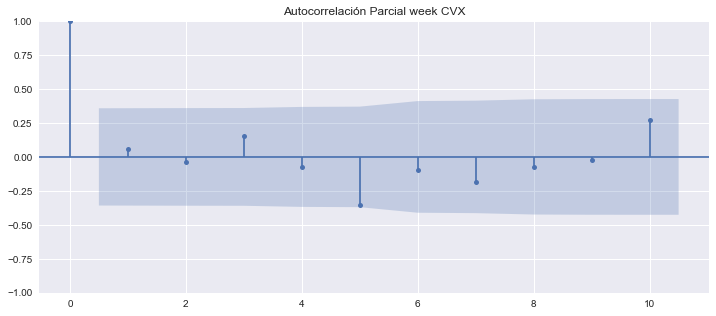

week DIS


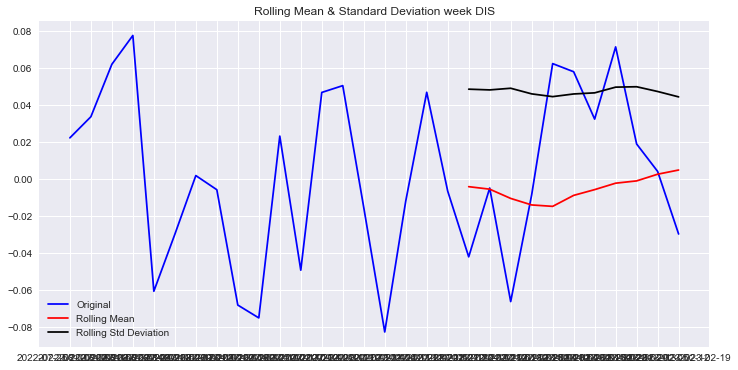

Test Statistic                 -3.870108
p-value                         0.002266
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


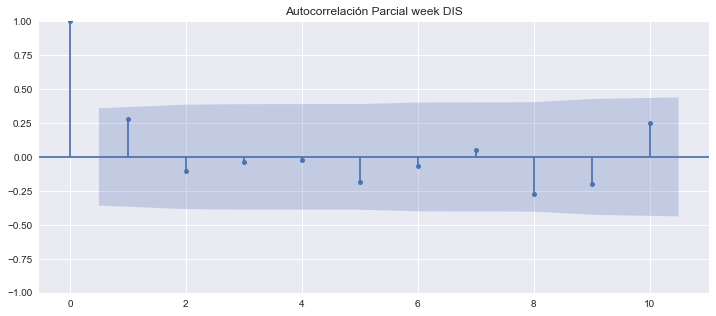

week DOW


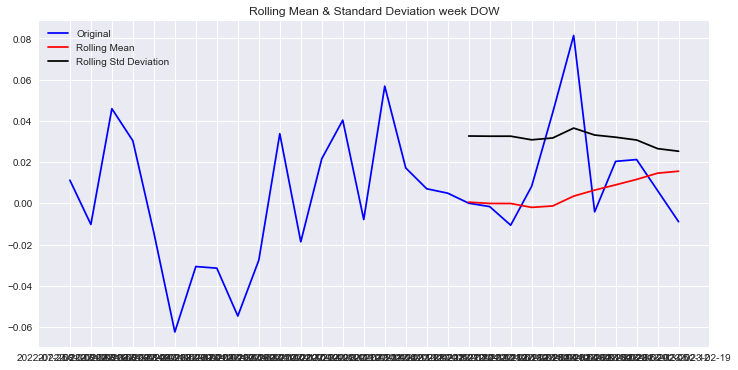

Test Statistic                 -3.657401
p-value                         0.004754
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


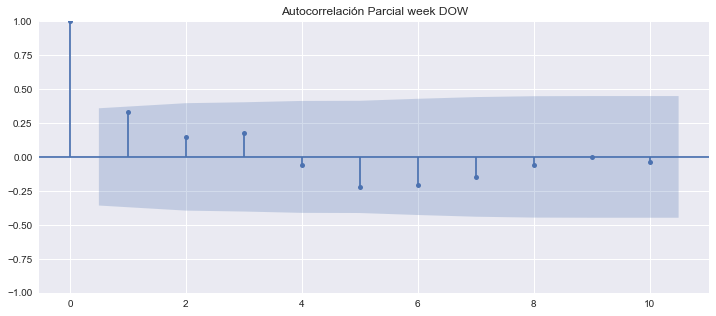

week GS


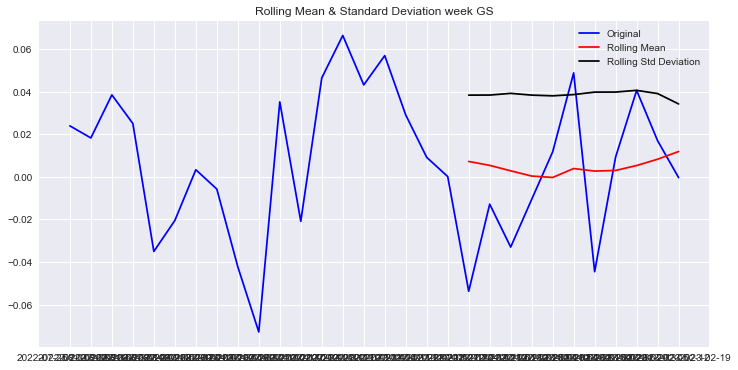

Test Statistic                 -2.806781
p-value                         0.057312
#Lags Used                      4.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


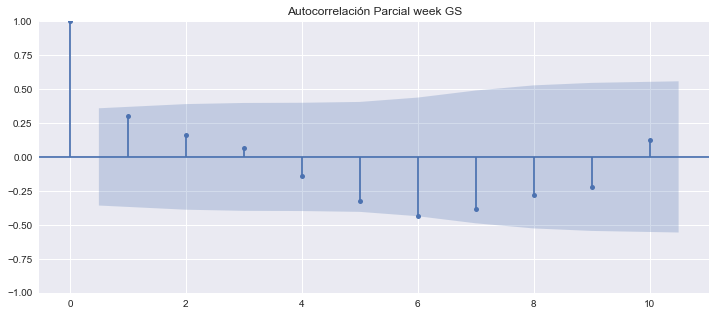

week HD


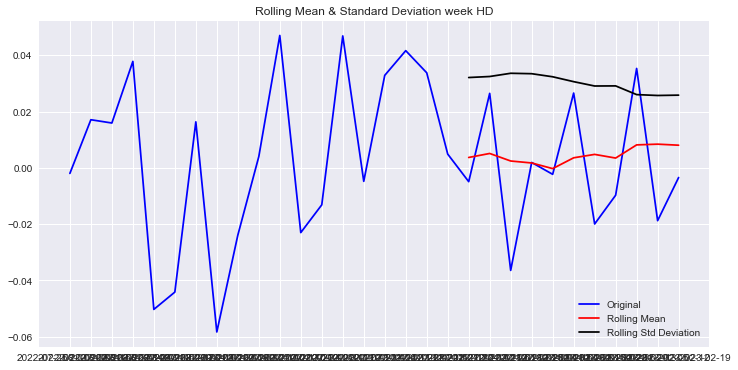

Test Statistic                 -2.644304
p-value                         0.084182
#Lags Used                      7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


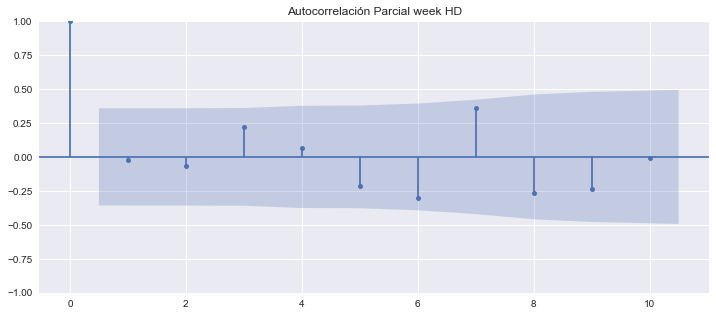

week HON


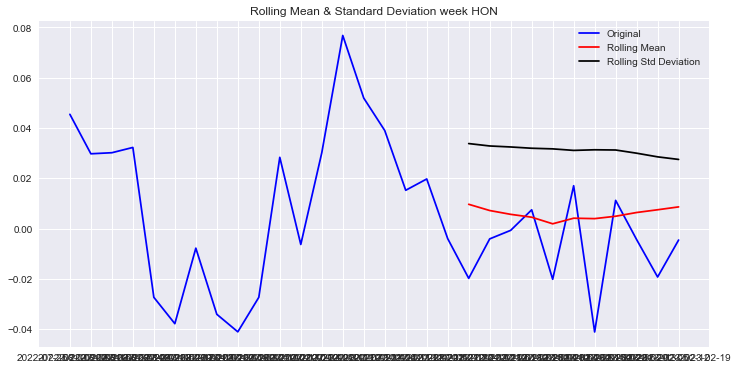

Test Statistic                 -3.392136
p-value                         0.011230
#Lags Used                      4.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


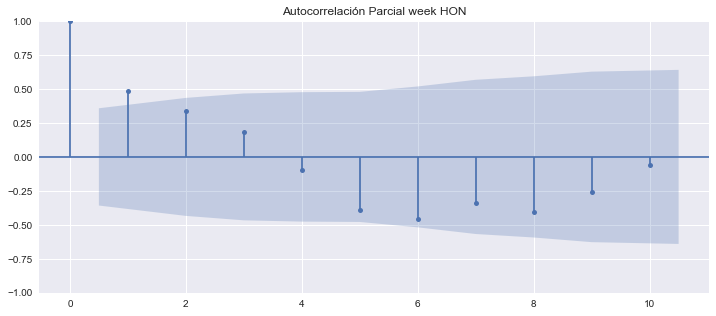

week IBM


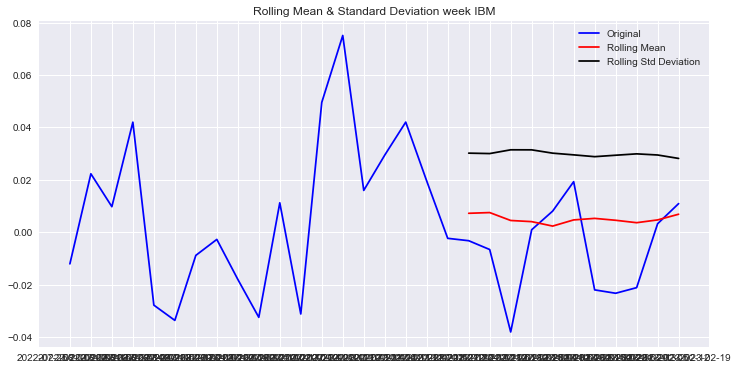

Test Statistic                 -3.732181
p-value                         0.003683
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


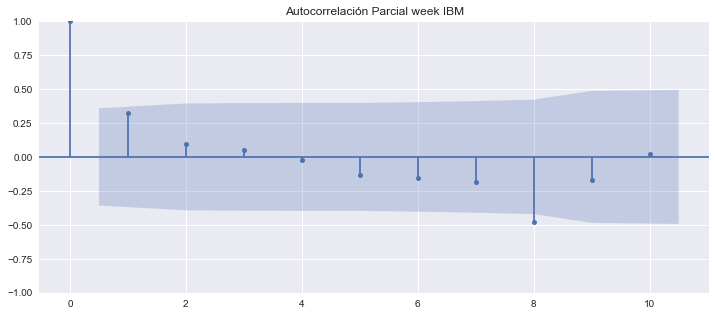

week INTC


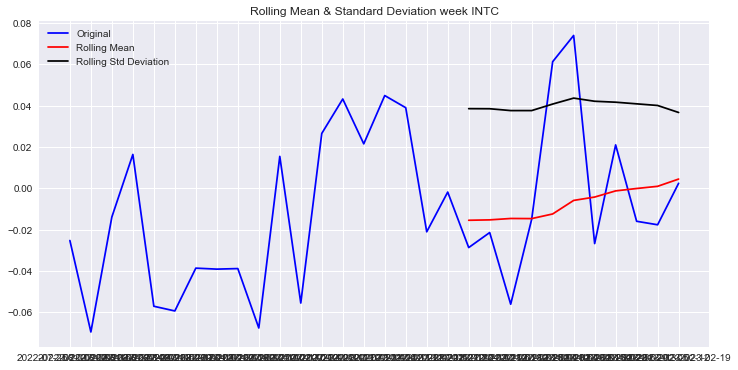

Test Statistic                 -3.729931
p-value                         0.003711
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


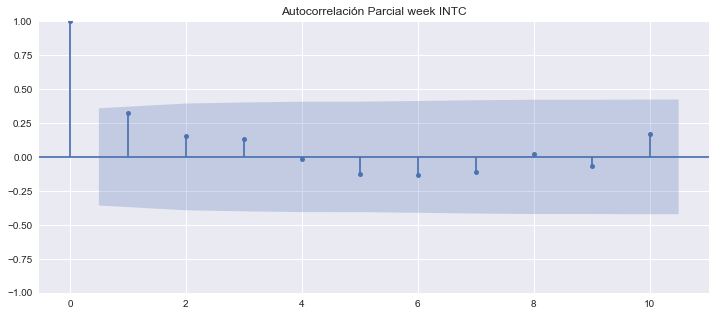

week JNJ


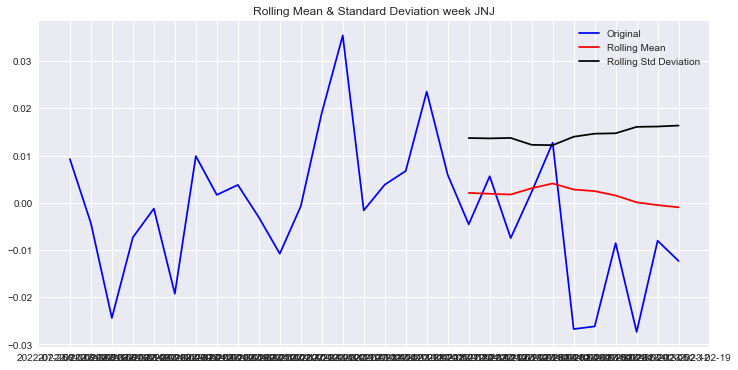

Test Statistic                 -3.694566
p-value                         0.004190
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


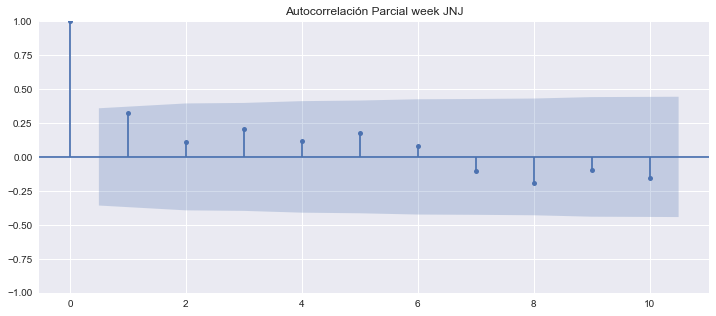

week JPM


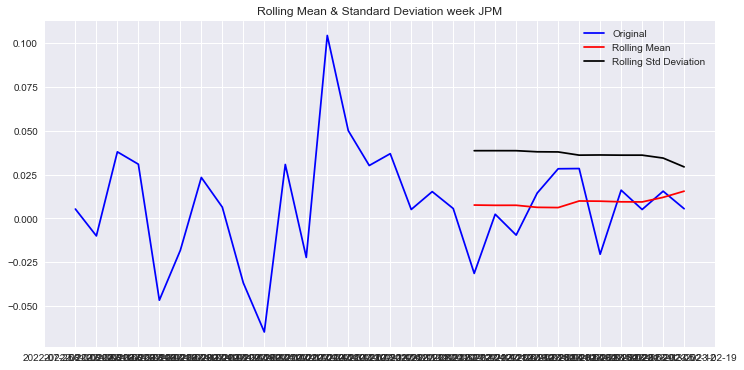

Test Statistic                 -2.386400
p-value                         0.145612
#Lags Used                      8.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


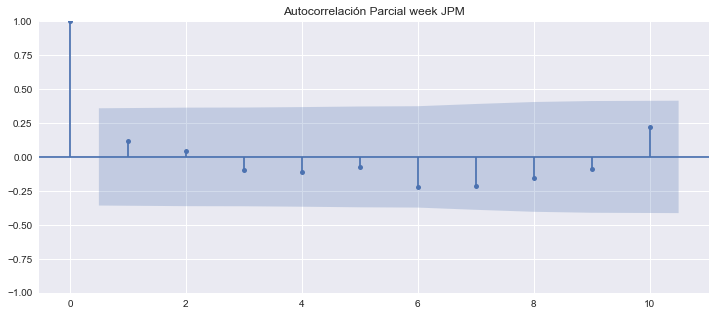

week KO


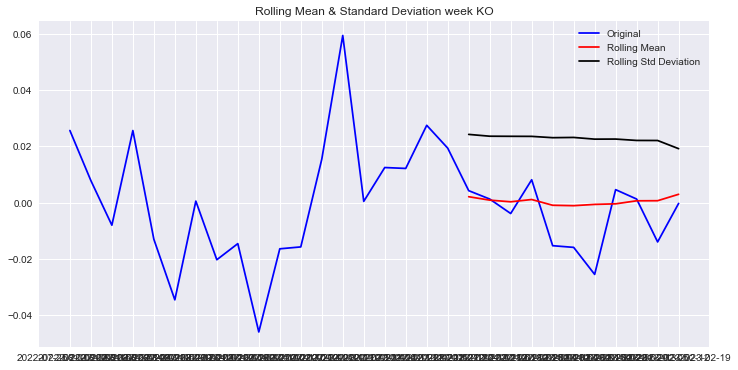

Test Statistic                 -2.537331
p-value                         0.106653
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


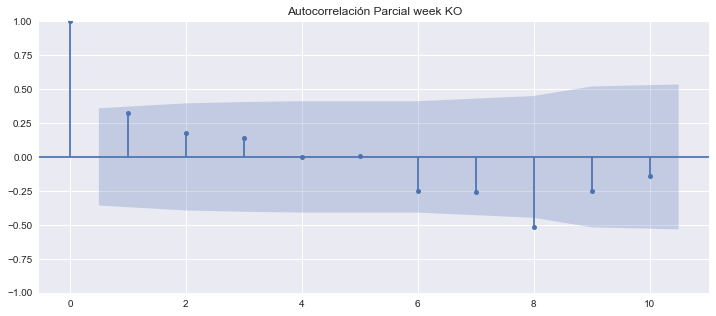

week MCD


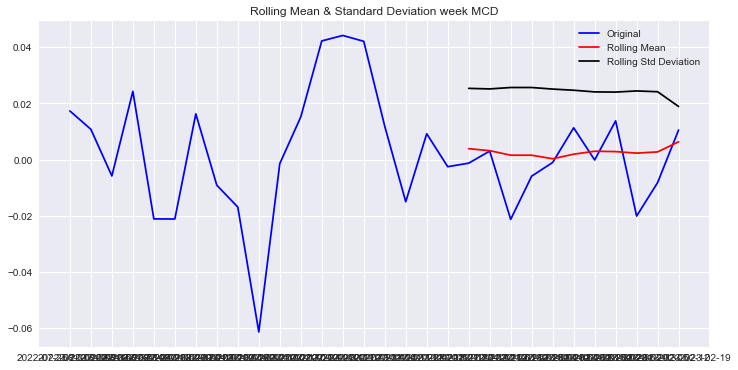

Test Statistic                 -2.652971
p-value                         0.082536
#Lags Used                      7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


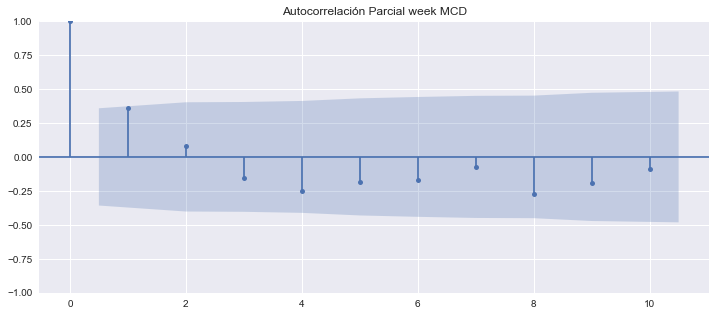

week MMM


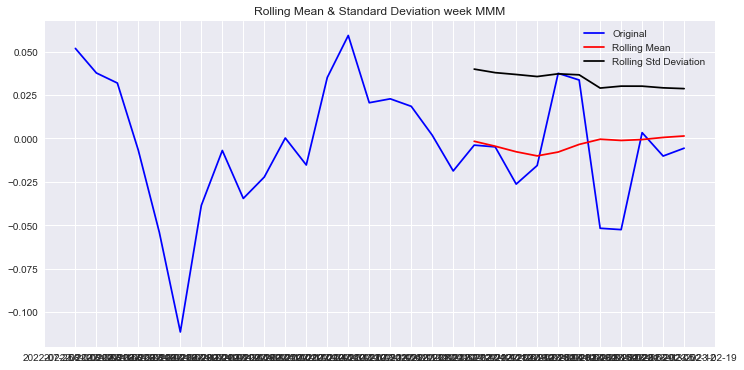

Test Statistic                 -2.978512
p-value                         0.036950
#Lags Used                      3.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


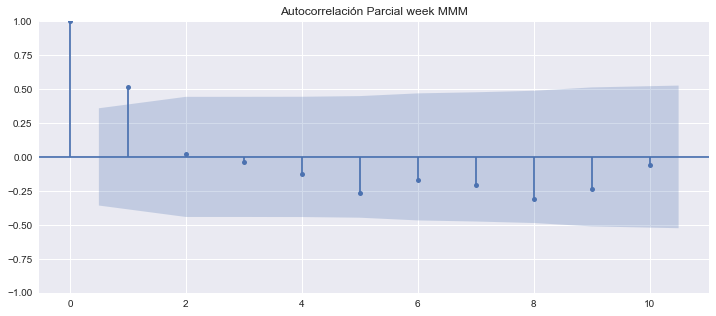

week MRK


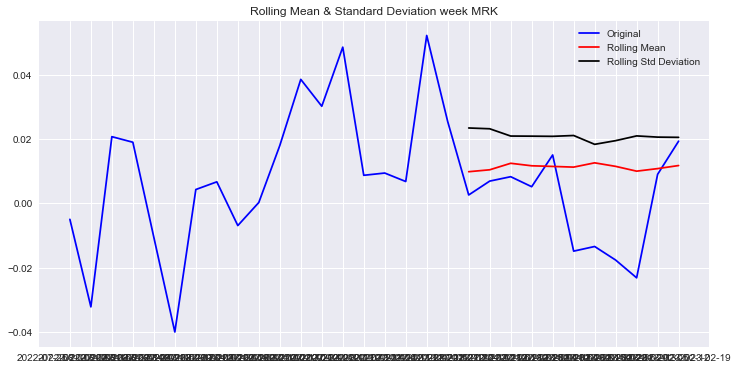

Test Statistic                 -3.404624
p-value                         0.010802
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


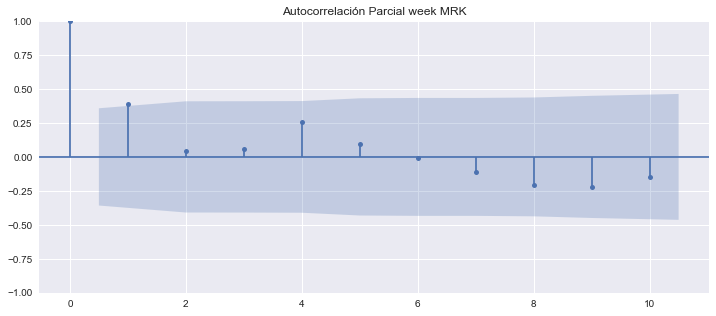

week MSFT


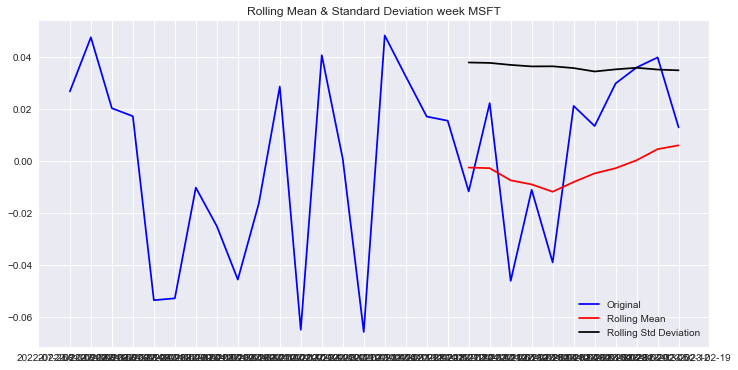

Test Statistic                 -4.716583
p-value                         0.000078
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


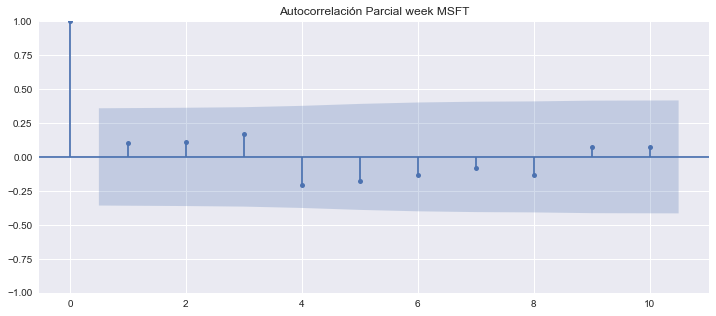

week NKE


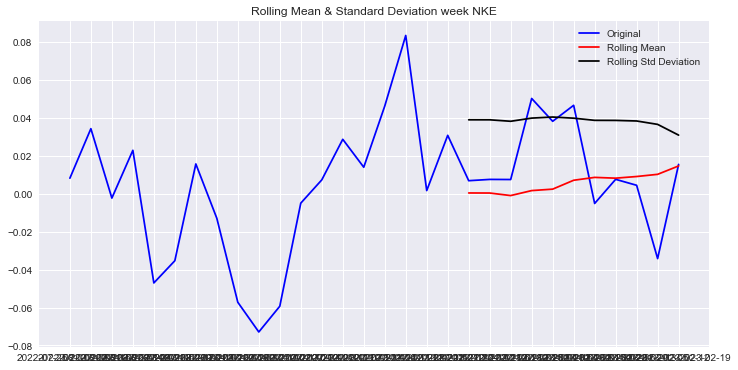

Test Statistic                 -3.030819
p-value                         0.032115
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


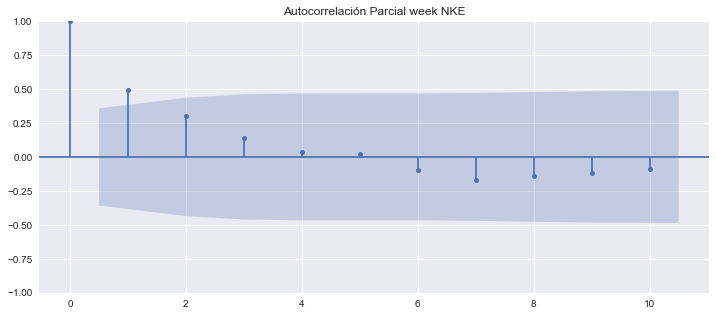

week PG


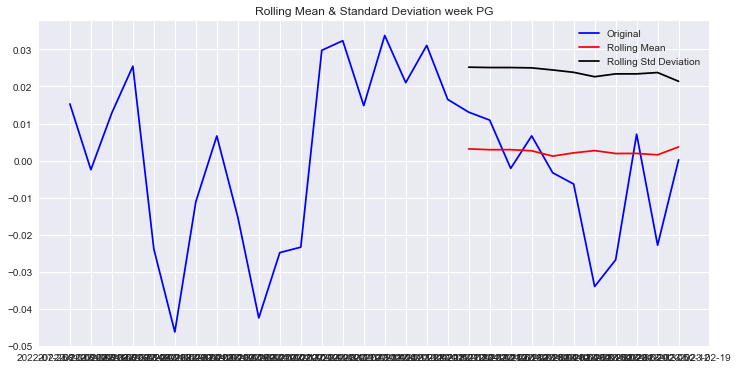

Test Statistic                 -2.867577
p-value                         0.049250
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


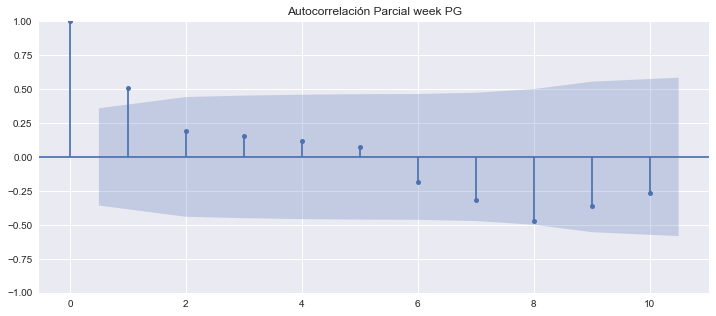

week TRV


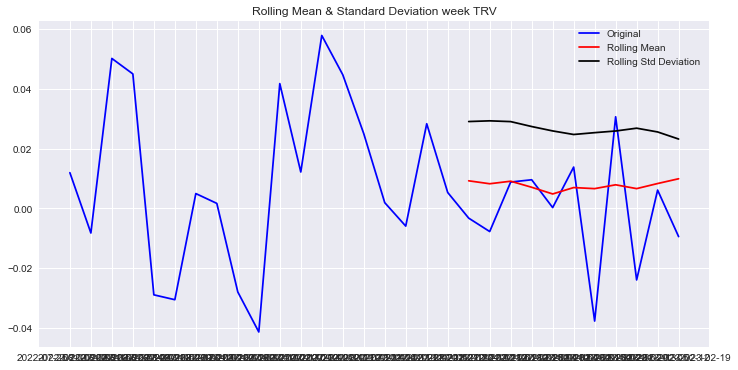

Test Statistic                 -4.703565
p-value                         0.000083
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


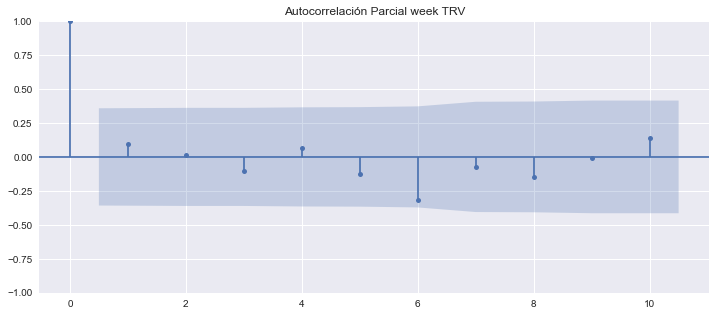

week UNH


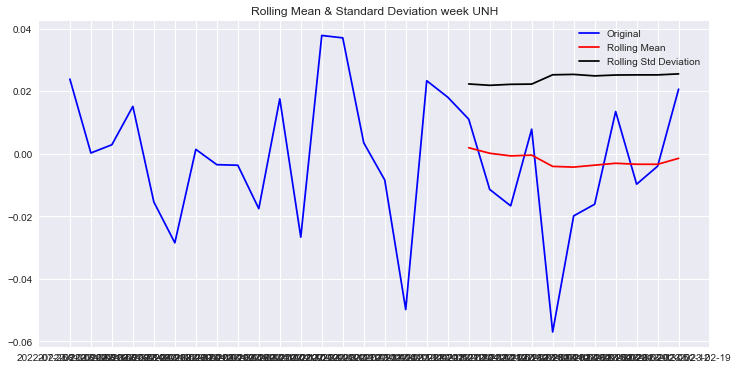

Test Statistic                 -5.142435
p-value                         0.000012
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


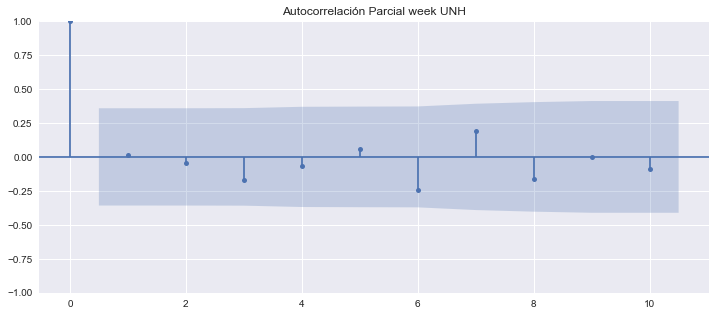

week V


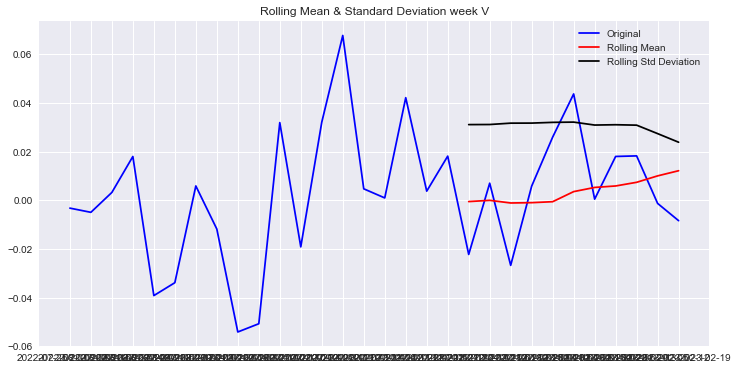

Test Statistic                 -4.062057
p-value                         0.001118
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


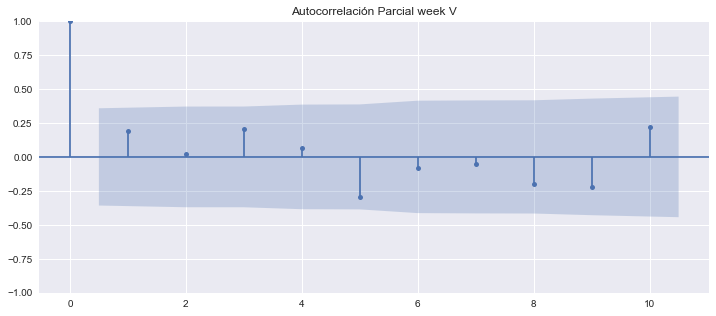

week VZ


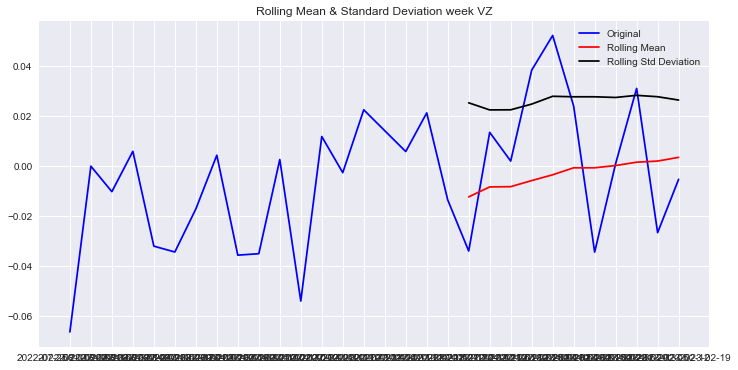

Test Statistic                 -4.968492
p-value                         0.000026
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


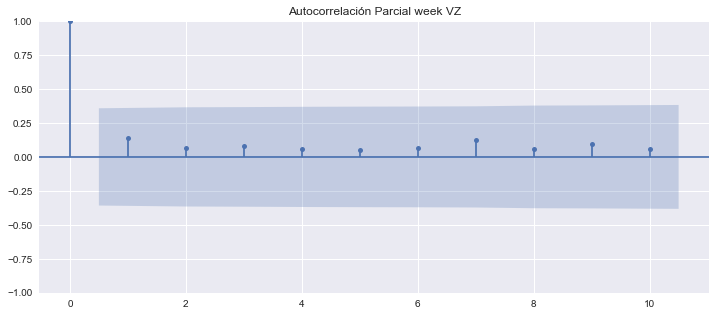

week WBA


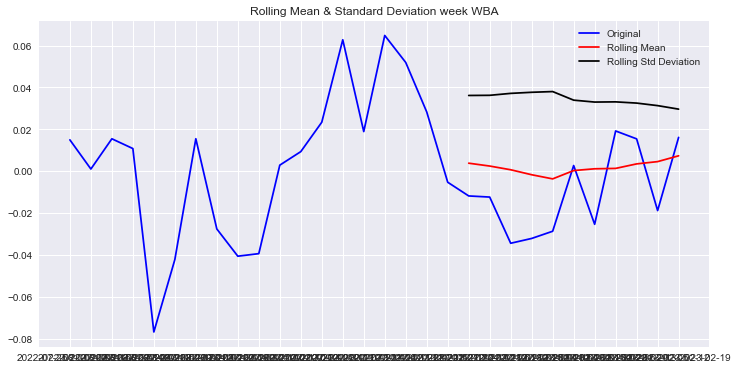

Test Statistic                 -3.367216
p-value                         0.012129
#Lags Used                      7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


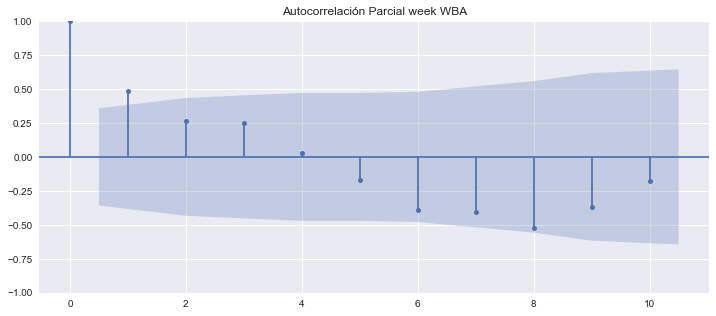

week WMT


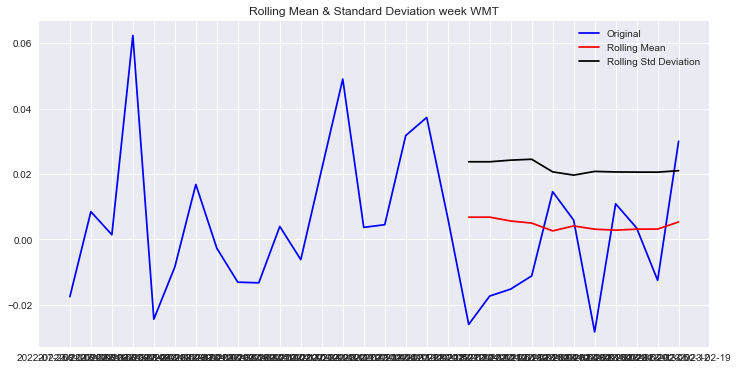

Test Statistic                 -2.903631
p-value                         0.044927
#Lags Used                      7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


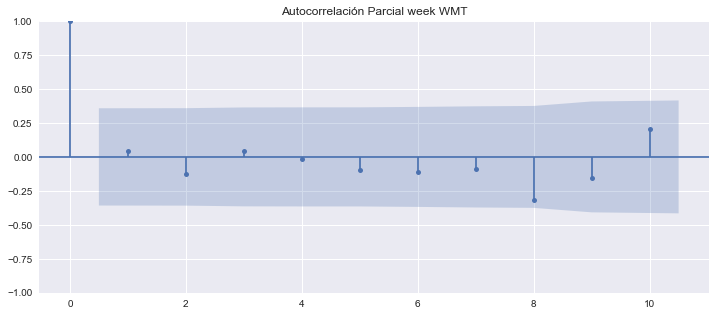

In [20]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for u in range(len(udiff2.columns)):
    plt.figure(figsize=(12, 6))
    item2=udiff2.columns.__getitem__(u)
    print(item2)
    orig2 = plt.plot(udiff2[item2], color='blue', label='Original')
    mean2 = plt.plot(rolmean2[item2], color='red', label='Rolling Mean')
    std2 = plt.plot(rolstd2[item2], color='black', label = 'Rolling Std Deviation')
    jo2='Rolling Mean & Standard Deviation {}'.format(item2)
    plt.title(jo2)
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    dftest2 = sm.tsa.adfuller(udiff2[item2], autolag='AIC')
    dfoutput2 = pd.Series(dftest2[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest2[4].items():
        dfoutput2['Critical Value ({0})'.format(key)] = value
    
    print(dfoutput2)
    
    # the autocorrelation chart provides just the correlation at increasing lags
    fig, ax = plt.subplots(figsize=(12,5))
    plot_acf(udiff2[item2].values, lags=10, ax=ax)
    jo2='Autocorrelación Parcial {}'.format(item2)
    plt.title(jo2)
    plt.show()

# MODELO ARIMA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  62.735
Date:                Sat, 18 Feb 2023   AIC                           -113.470
Time:                        17:12:50   BIC                           -105.063
Sample:                             0   HQIC                          -110.781
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.009      0.095      0.924      -0.016       0.018
ar.L1          0.4054      7.053      0.057      0.954     -13.418      14.229
ar.L2         -0.1177      3.348     -0.035      0.9

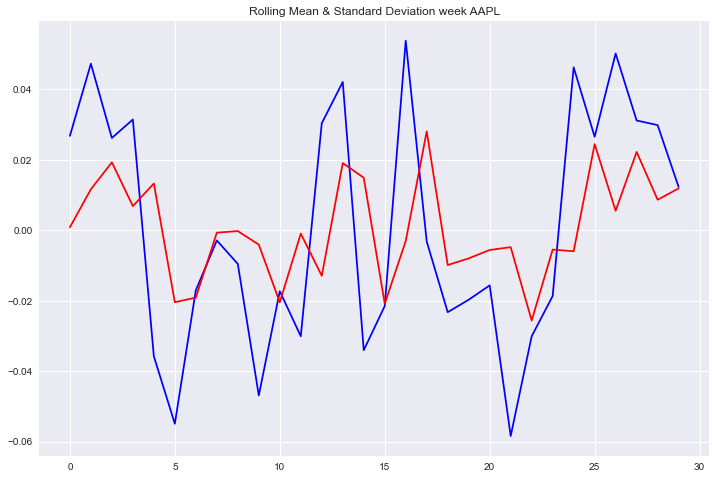

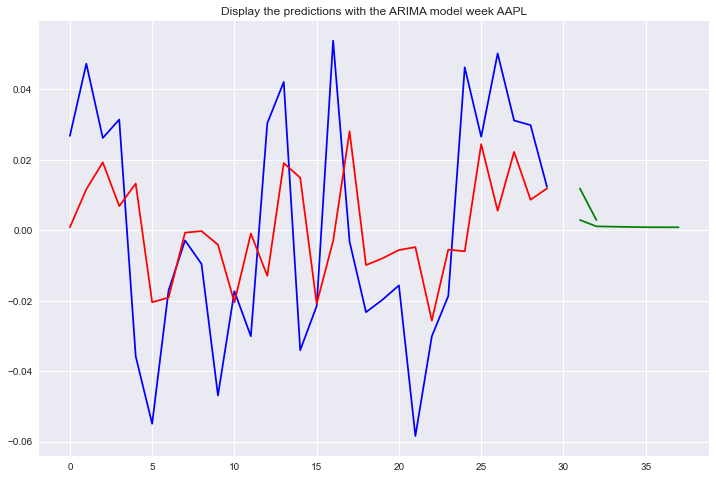

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  68.404
Date:                Sat, 18 Feb 2023   AIC                           -124.809
Time:                        17:12:51   BIC                           -116.402
Sample:                             0   HQIC                          -122.119
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.005      0.458      0.647      -0.008       0.013
ar.L1          1.1307      0.371      3.051      0.002       0.404       1.857
ar.L2          0.0653      0.444      0.147      0.8

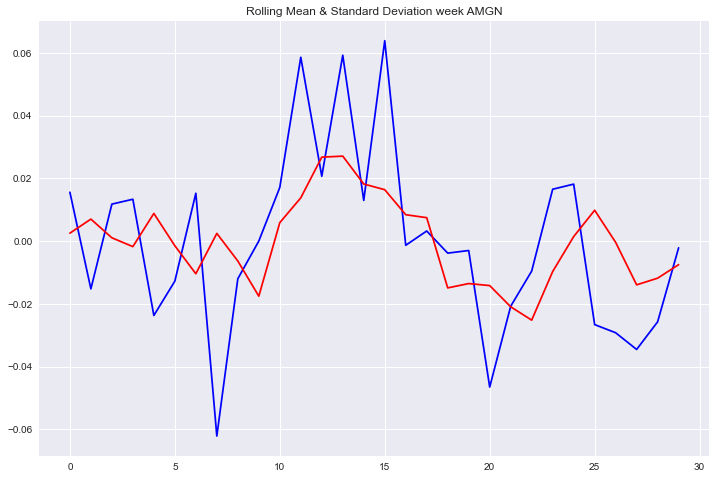

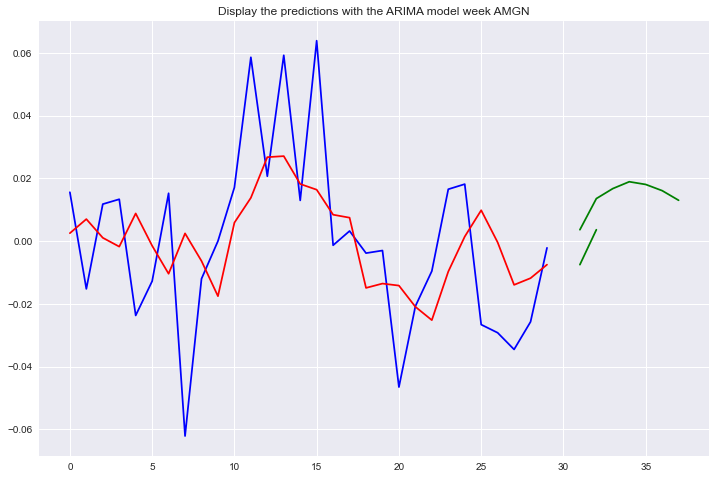

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  59.681
Date:                Sat, 18 Feb 2023   AIC                           -107.362
Time:                        17:12:52   BIC                            -98.954
Sample:                             0   HQIC                          -104.672
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.008      0.847      0.397      -0.009       0.023
ar.L1         -0.4029      0.953     -0.423      0.672      -2.270       1.464
ar.L2         -0.0221      0.344     -0.064      0.9

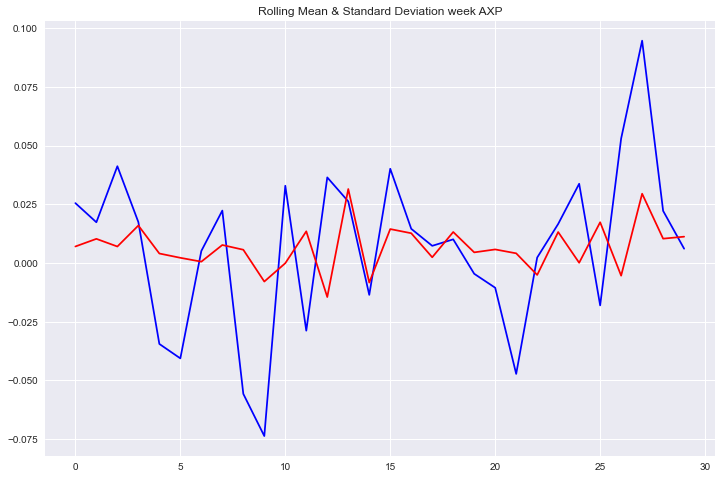

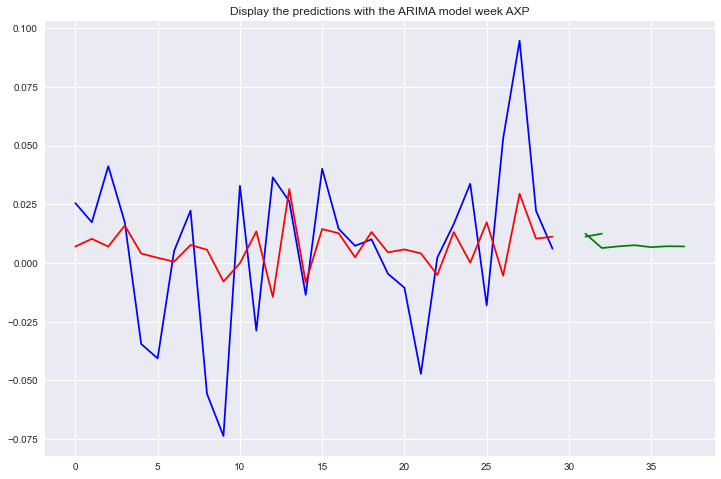

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  56.611
Date:                Sat, 18 Feb 2023   AIC                           -101.222
Time:                        17:12:53   BIC                            -92.815
Sample:                             0   HQIC                           -98.532
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.016      0.701      0.483      -0.020       0.042
ar.L1         -0.5121      0.282     -1.819      0.069      -1.064       0.040
ar.L2          0.3457      0.220      1.574      0.1

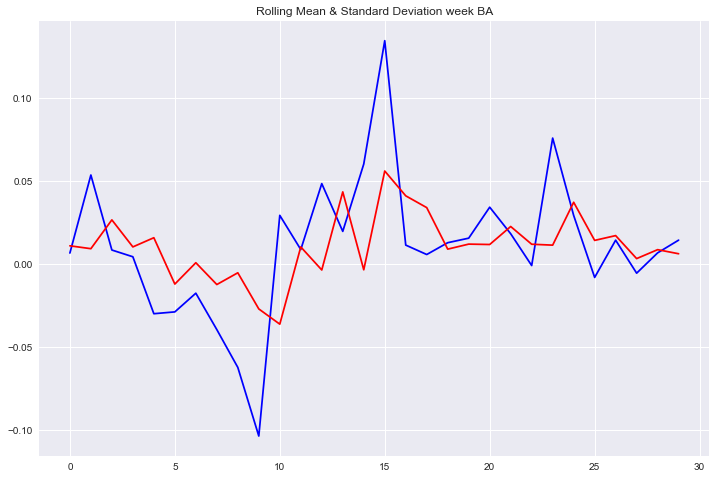

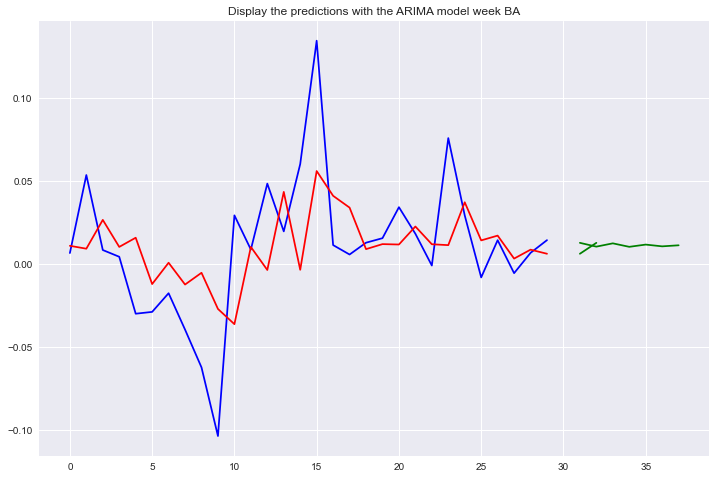

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  59.287
Date:                Sat, 18 Feb 2023   AIC                           -106.573
Time:                        17:12:53   BIC                            -98.166
Sample:                             0   HQIC                          -103.884
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.012      0.897      0.370      -0.013       0.035
ar.L1          0.1726      0.826      0.209      0.834      -1.447       1.792
ar.L2         -0.0588      0.337     -0.175      0.8

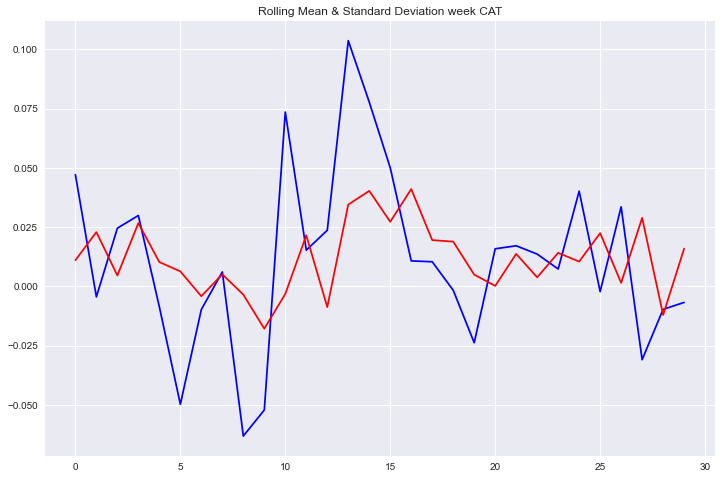

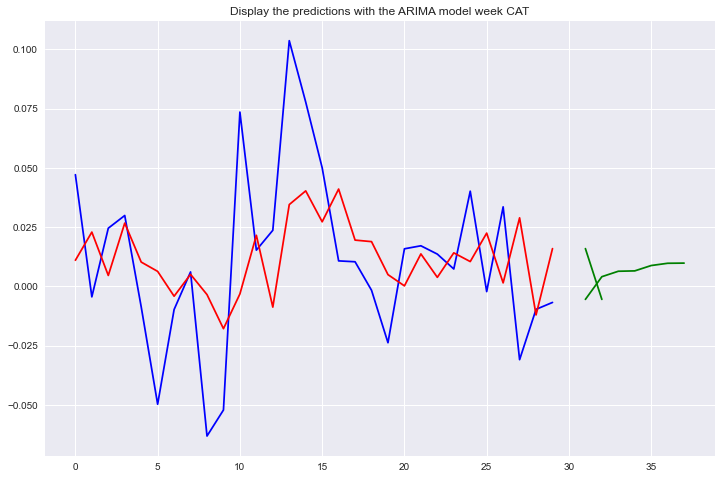

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  46.832
Date:                Sat, 18 Feb 2023   AIC                            -81.665
Time:                        17:12:54   BIC                            -73.257
Sample:                             0   HQIC                           -78.975
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.014     -0.084      0.933      -0.029       0.027
ar.L1         -0.1009      1.512     -0.067      0.947      -3.064       2.862
ar.L2          0.0332      0.356      0.093      0.9

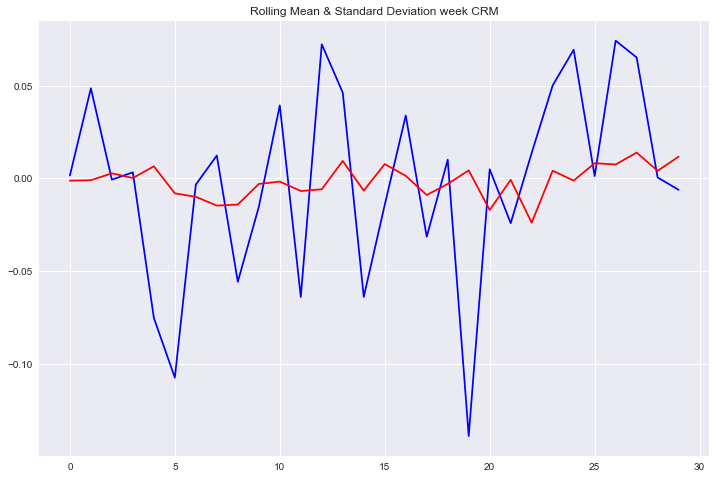

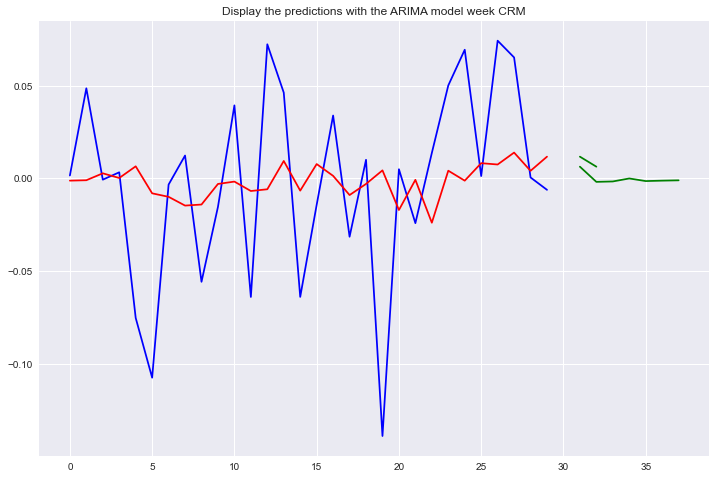

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  64.730
Date:                Sat, 18 Feb 2023   AIC                           -117.460
Time:                        17:12:55   BIC                           -109.053
Sample:                             0   HQIC                          -114.771
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.008      0.613      0.540      -0.010       0.020
ar.L1         -0.0599      0.592     -0.101      0.919      -1.221       1.101
ar.L2         -0.1044      0.233     -0.448      0.6

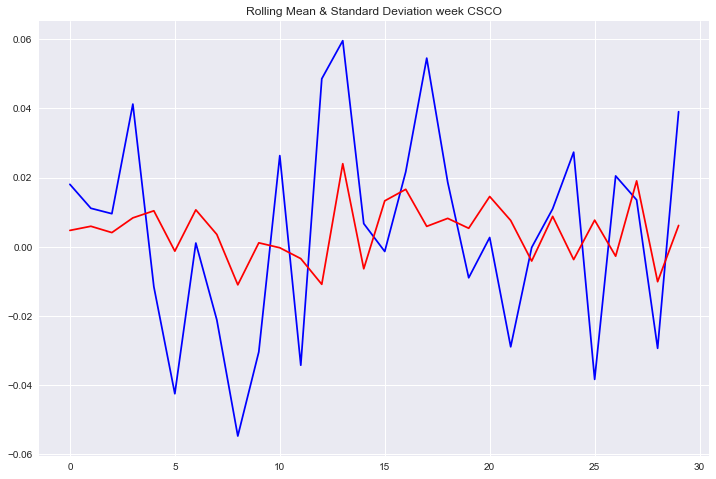

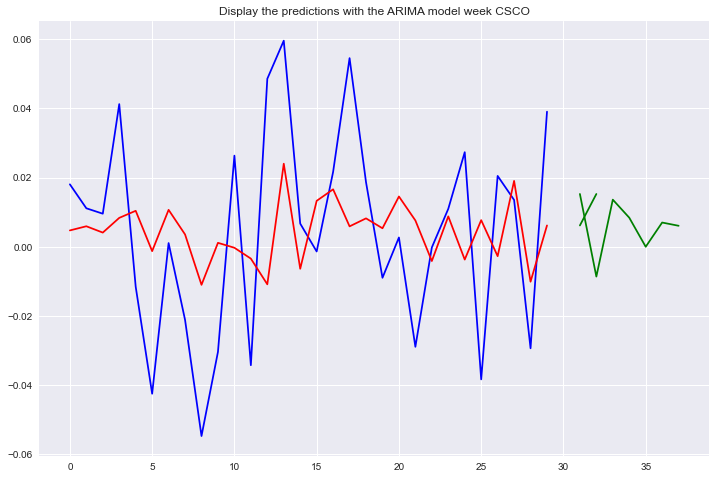

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  59.113
Date:                Sat, 18 Feb 2023   AIC                           -106.227
Time:                        17:12:56   BIC                            -97.820
Sample:                             0   HQIC                          -103.537
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.010      0.604      0.546      -0.013       0.025
ar.L1         -0.0407      1.470     -0.028      0.978      -2.921       2.839
ar.L2         -0.0380      0.236     -0.161      0.8

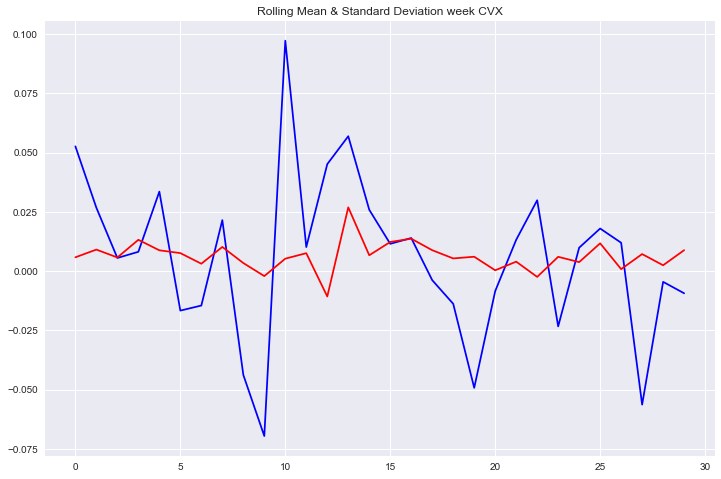

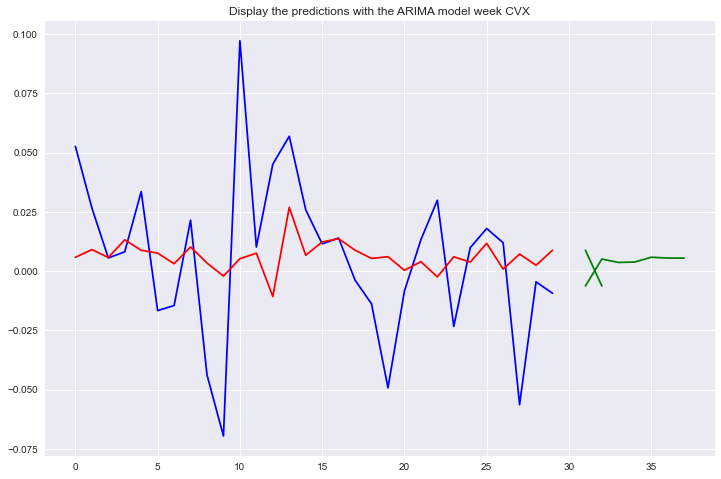

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  51.444
Date:                Sat, 18 Feb 2023   AIC                            -90.888
Time:                        17:12:57   BIC                            -82.481
Sample:                             0   HQIC                           -88.198
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.011      0.153      0.879      -0.020       0.024
ar.L1          0.1466      3.676      0.040      0.968      -7.058       7.351
ar.L2         -0.1462      1.226     -0.119      0.9

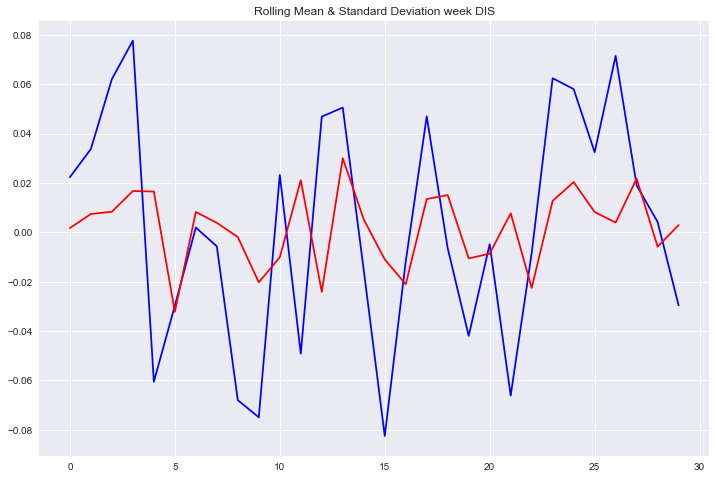

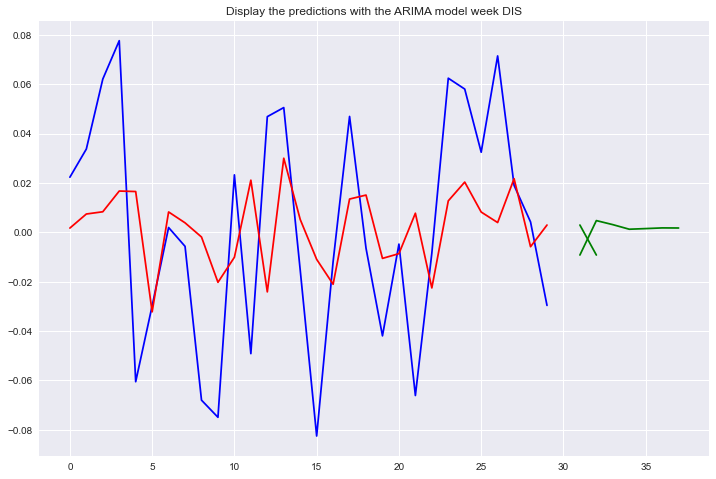

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  63.667
Date:                Sat, 18 Feb 2023   AIC                           -115.335
Time:                        17:12:58   BIC                           -106.928
Sample:                             0   HQIC                          -112.645
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.011      0.513      0.608      -0.016       0.027
ar.L1         -0.0945      1.622     -0.058      0.954      -3.273       3.084
ar.L2          0.1065      0.519      0.205      0.8

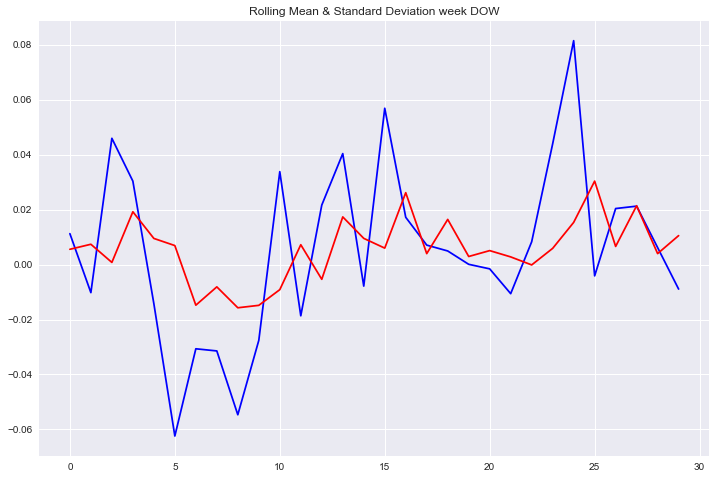

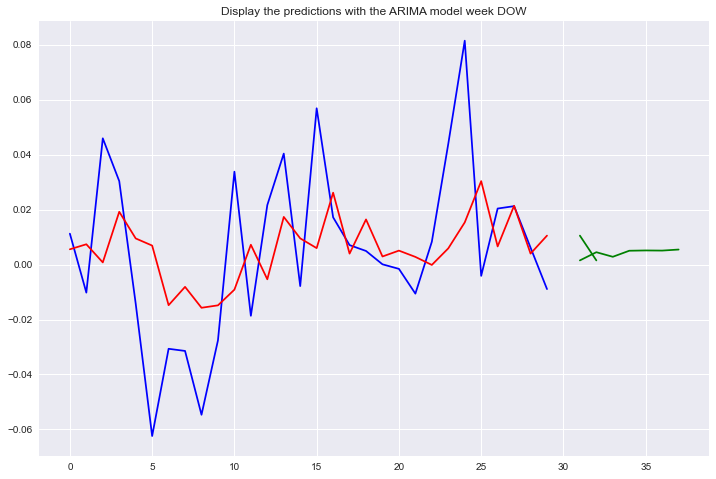

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  59.844
Date:                Sat, 18 Feb 2023   AIC                           -107.688
Time:                        17:12:58   BIC                            -99.281
Sample:                             0   HQIC                          -104.999
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.011      0.532      0.595      -0.016       0.028
ar.L1          0.1477      8.586      0.017      0.986     -16.680      16.975
ar.L2          0.1002      2.315      0.043      0.9

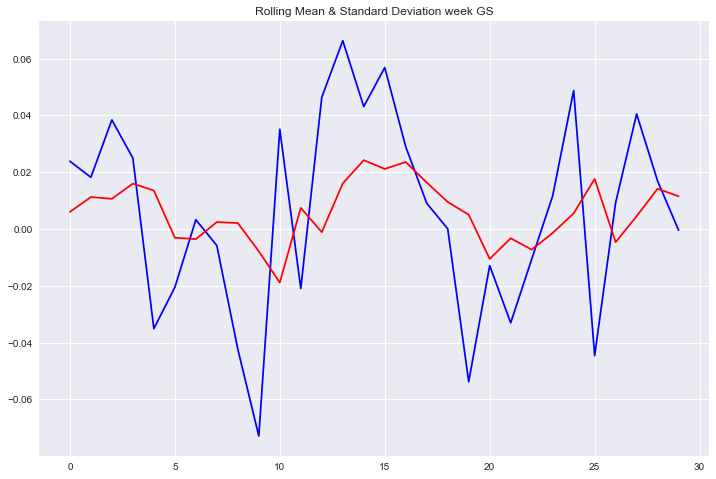

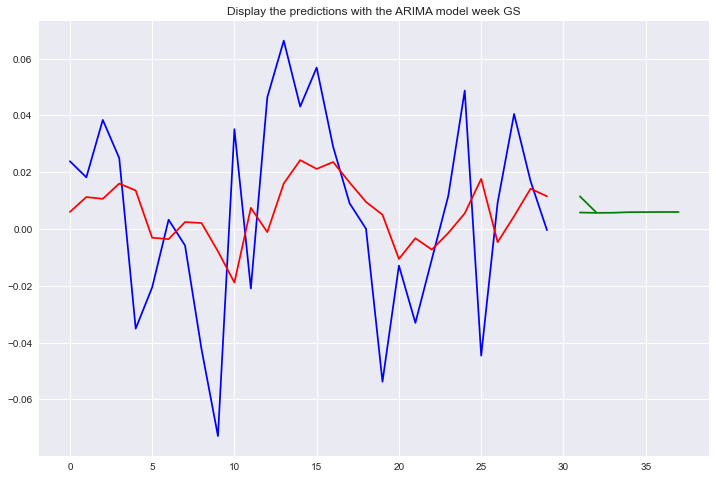

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  64.881
Date:                Sat, 18 Feb 2023   AIC                           -117.761
Time:                        17:12:59   BIC                           -109.354
Sample:                             0   HQIC                          -115.072
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.007      0.414      0.679      -0.010       0.016
ar.L1          0.0830      1.176      0.071      0.944      -2.222       2.388
ar.L2         -0.0610      0.215     -0.284      0.7

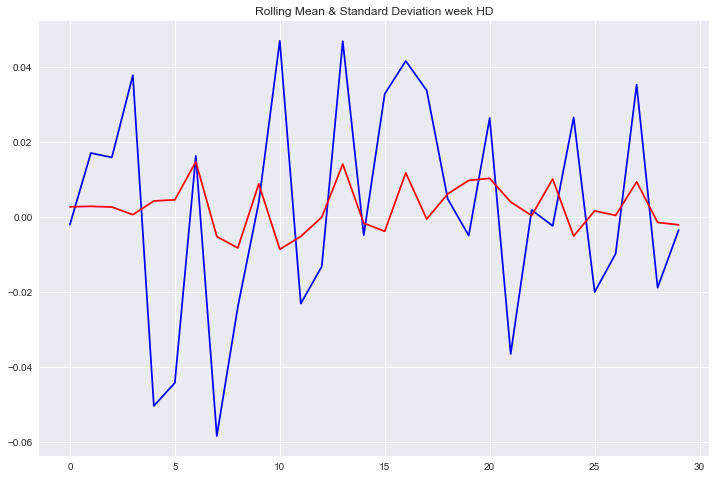

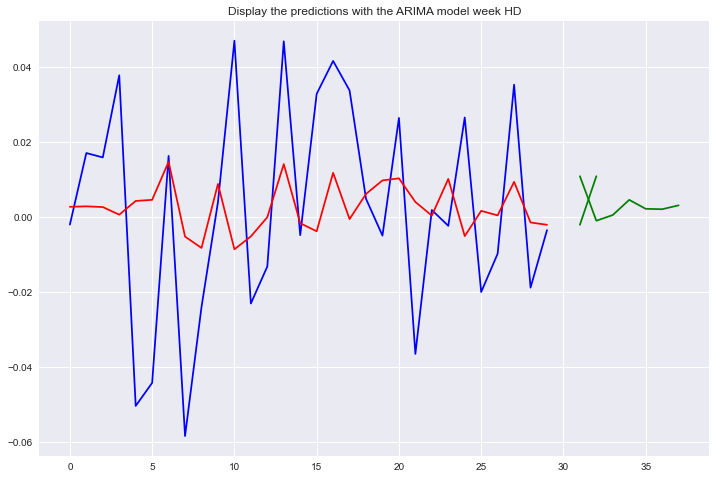

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  67.837
Date:                Sat, 18 Feb 2023   AIC                           -123.675
Time:                        17:13:00   BIC                           -115.268
Sample:                             0   HQIC                          -120.985
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.011      0.548      0.584      -0.015       0.027
ar.L1         -0.3775      3.445     -0.110      0.913      -7.129       6.374
ar.L2          0.4786      1.720      0.278      0.7

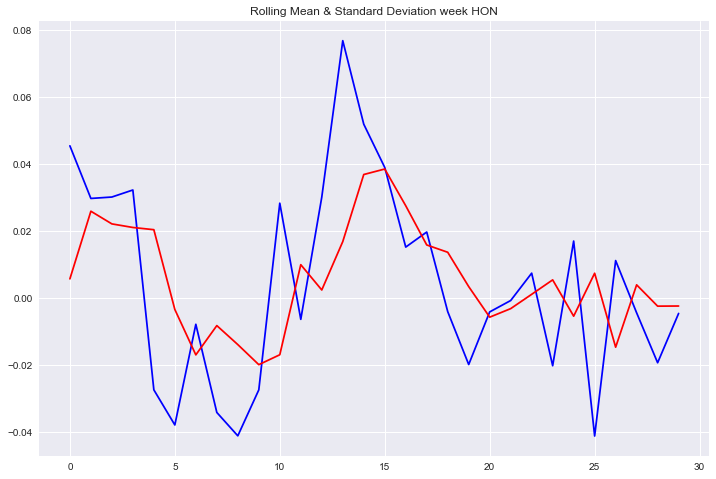

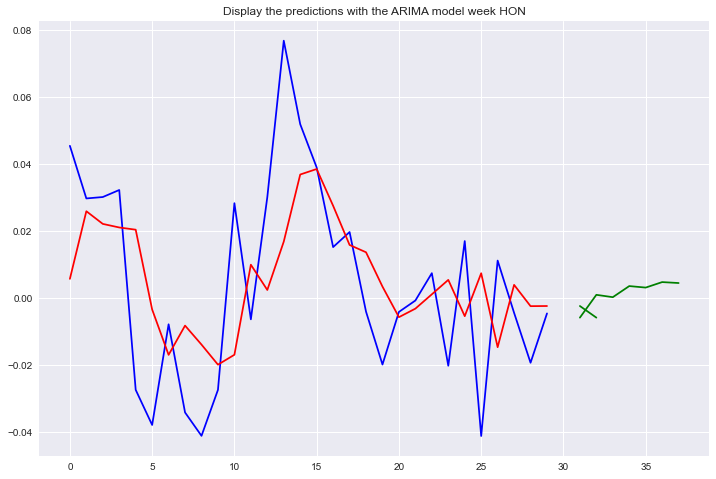

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  67.544
Date:                Sat, 18 Feb 2023   AIC                           -123.088
Time:                        17:13:01   BIC                           -114.681
Sample:                             0   HQIC                          -120.399
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.008      0.305      0.761      -0.013       0.018
ar.L1          0.1653      7.491      0.022      0.982     -14.517      14.848
ar.L2          0.0231      2.356      0.010      0.9

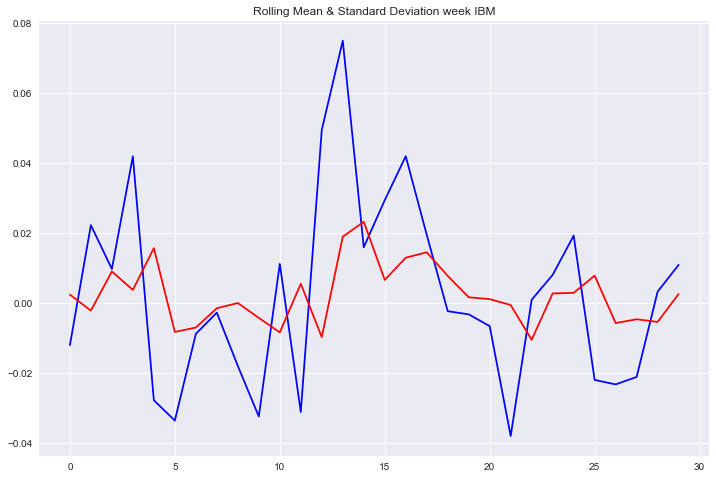

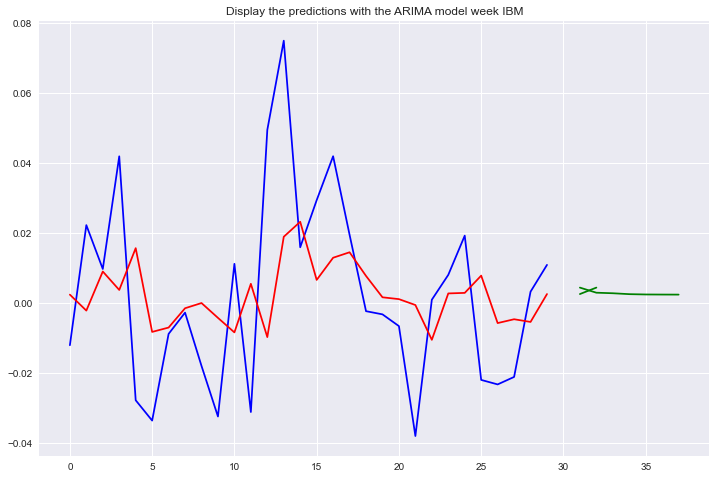

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  56.811
Date:                Sat, 18 Feb 2023   AIC                           -101.621
Time:                        17:13:02   BIC                            -93.214
Sample:                             0   HQIC                           -98.932
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0107      0.014     -0.789      0.430      -0.037       0.016
ar.L1         -0.0016      2.724     -0.001      1.000      -5.341       5.337
ar.L2          0.1273      0.816      0.156      0.8

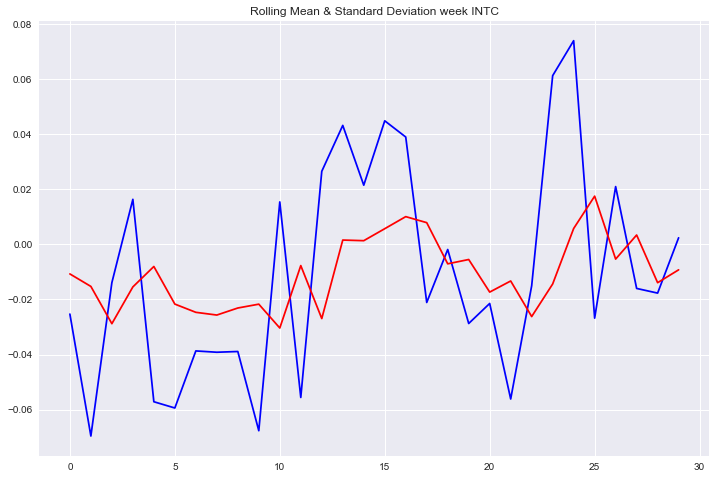

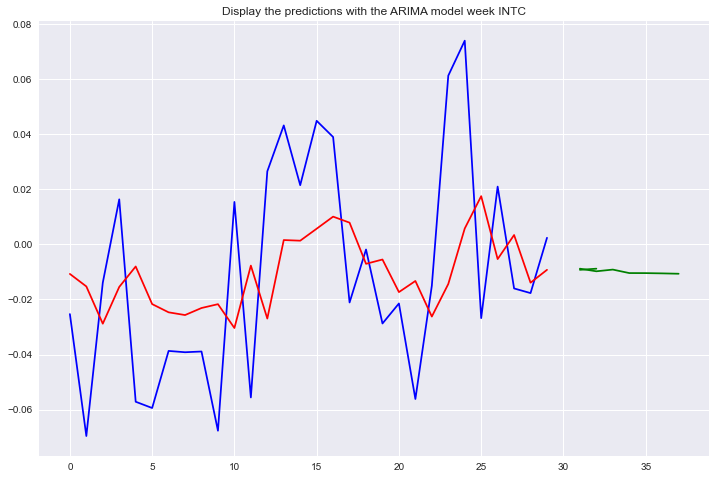

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  86.882
Date:                Sat, 18 Feb 2023   AIC                           -161.765
Time:                        17:13:04   BIC                           -153.358
Sample:                             0   HQIC                          -159.075
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.006     -0.412      0.680      -0.014       0.009
ar.L1          0.1748      0.786      0.222      0.824      -1.366       1.716
ar.L2         -0.0164      0.405     -0.041      0.9

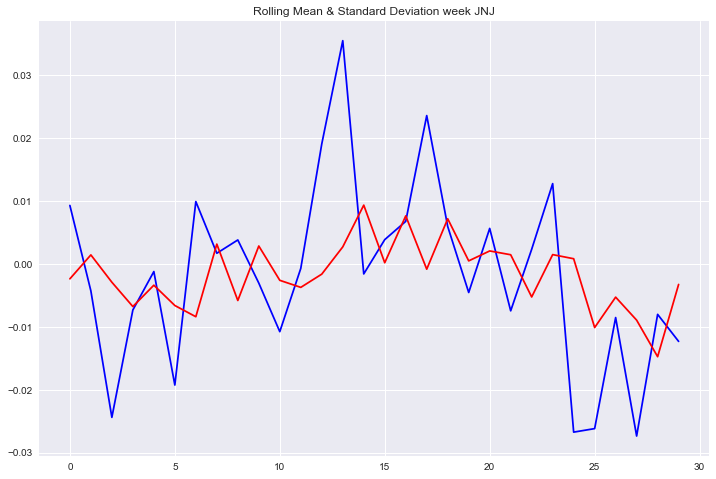

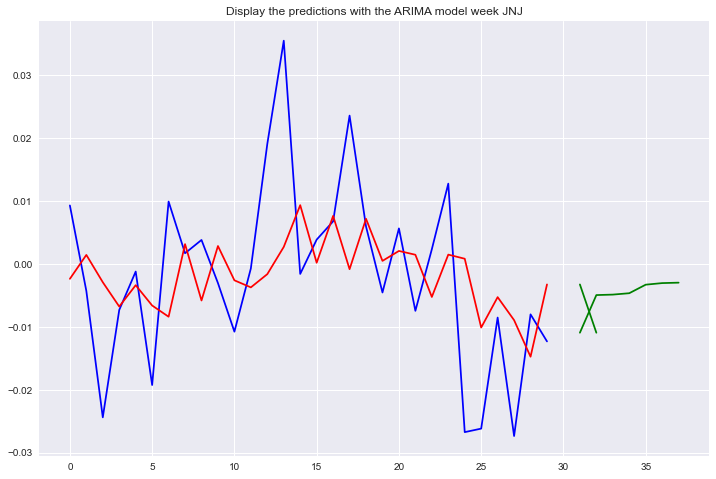

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  62.401
Date:                Sat, 18 Feb 2023   AIC                           -112.801
Time:                        17:13:06   BIC                           -104.394
Sample:                             0   HQIC                          -110.111
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.004      2.146      0.032       0.001       0.017
ar.L1          0.9960      0.326      3.058      0.002       0.358       1.634
ar.L2         -0.1653      0.239     -0.691      0.4

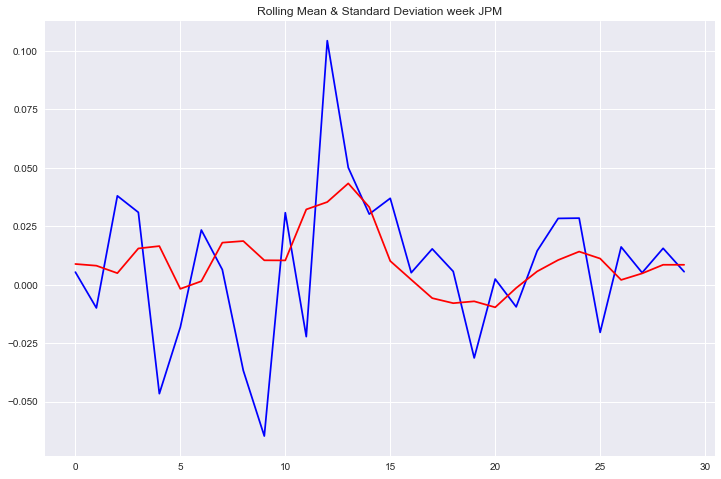

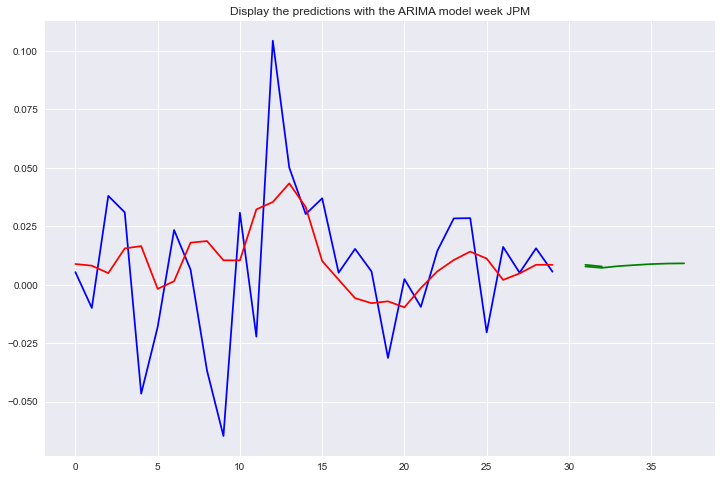

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  77.480
Date:                Sat, 18 Feb 2023   AIC                           -142.960
Time:                        17:13:07   BIC                           -134.553
Sample:                             0   HQIC                          -140.270
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.69e-05      0.007     -0.011      0.991      -0.014       0.014
ar.L1         -0.5326      0.381     -1.398      0.162      -1.279       0.214
ar.L2          0.2923      0.285      1.026      0.3

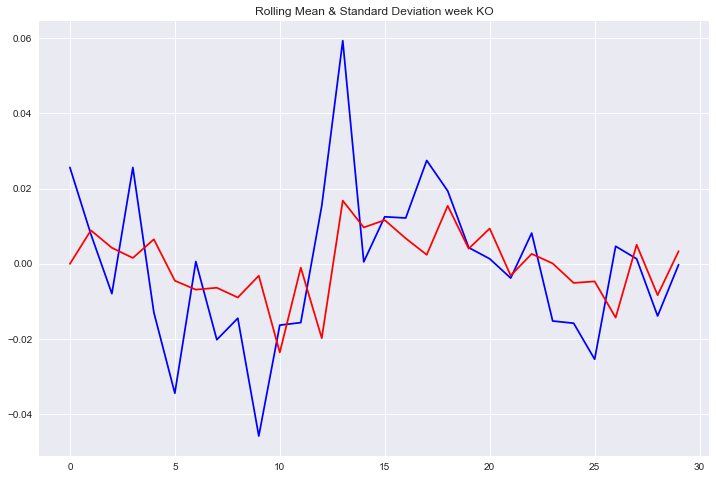

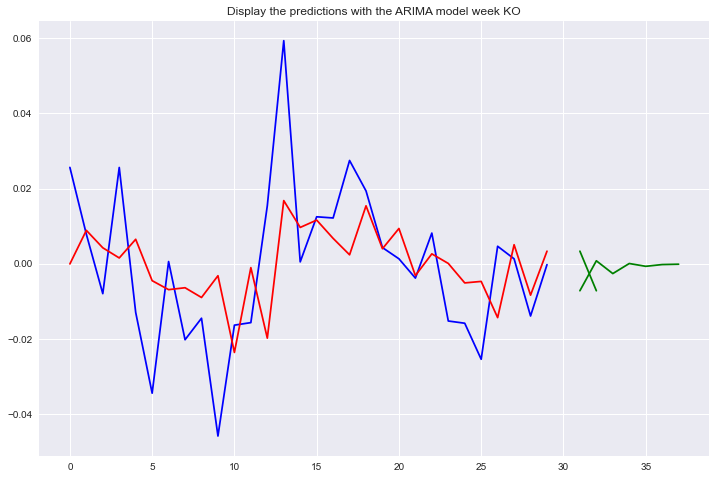

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  76.439
Date:                Sat, 18 Feb 2023   AIC                           -140.877
Time:                        17:13:08   BIC                           -132.470
Sample:                             0   HQIC                          -138.188
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.003      0.684      0.494      -0.004       0.008
ar.L1          1.0670      0.456      2.340      0.019       0.173       1.961
ar.L2         -0.2837      0.462     -0.614      0.5

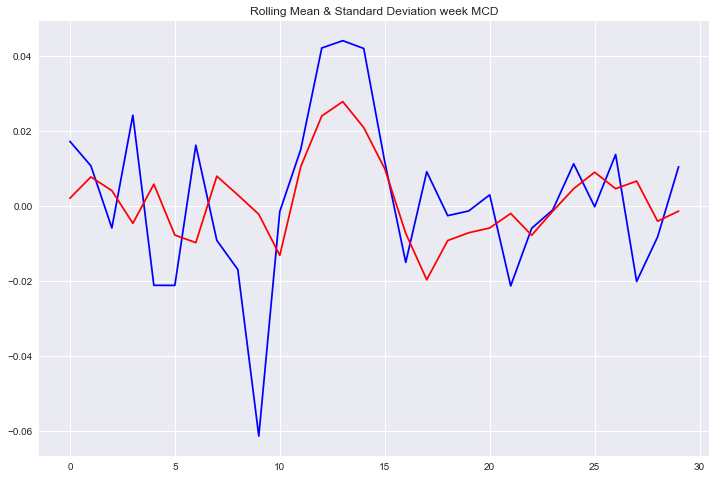

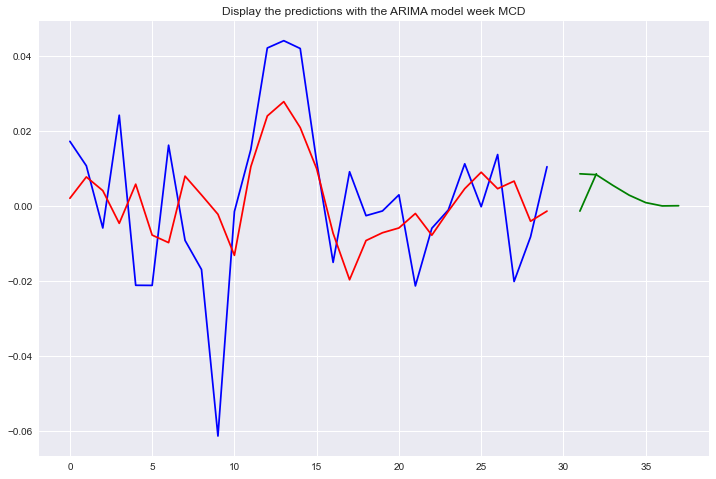

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  65.319
Date:                Sat, 18 Feb 2023   AIC                           -118.638
Time:                        17:13:09   BIC                           -110.231
Sample:                             0   HQIC                          -115.949
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.012     -0.153      0.878      -0.024       0.021
ar.L1          0.3552      0.925      0.384      0.701      -1.458       2.168
ar.L2         -0.1954      0.725     -0.269      0.7

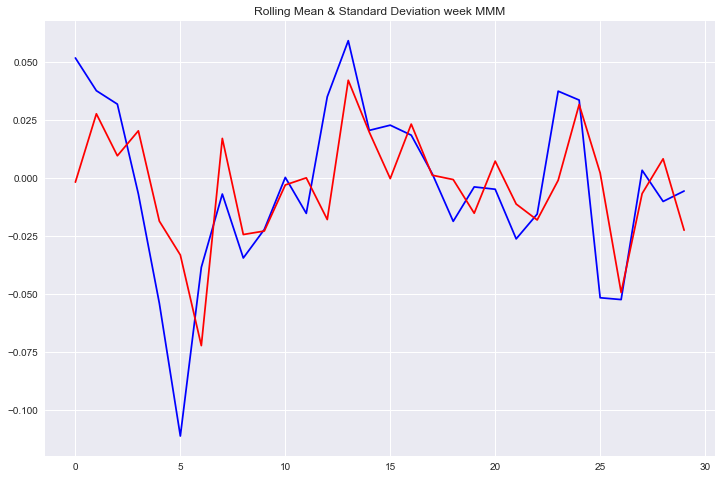

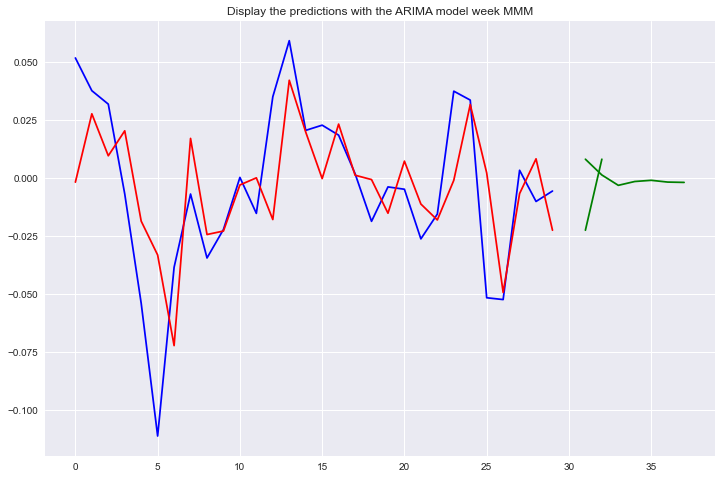

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  76.517
Date:                Sat, 18 Feb 2023   AIC                           -141.034
Time:                        17:13:10   BIC                           -132.627
Sample:                             0   HQIC                          -138.344
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.007      0.888      0.375      -0.007       0.019
ar.L1          0.8164      1.015      0.805      0.421      -1.172       2.805
ar.L2         -0.3884      0.452     -0.859      0.3

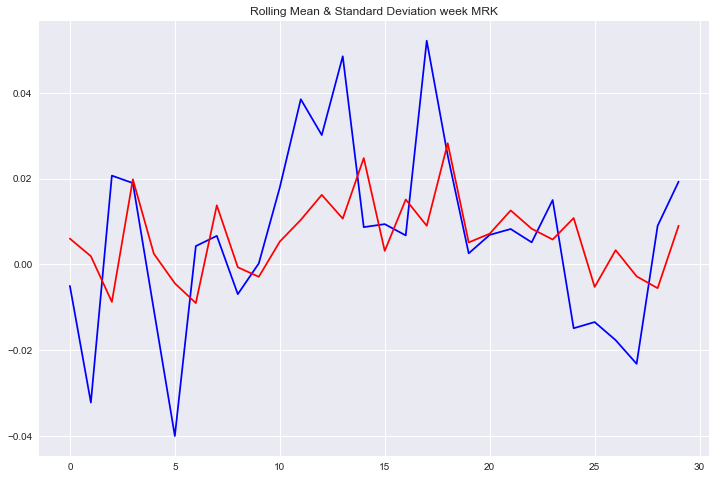

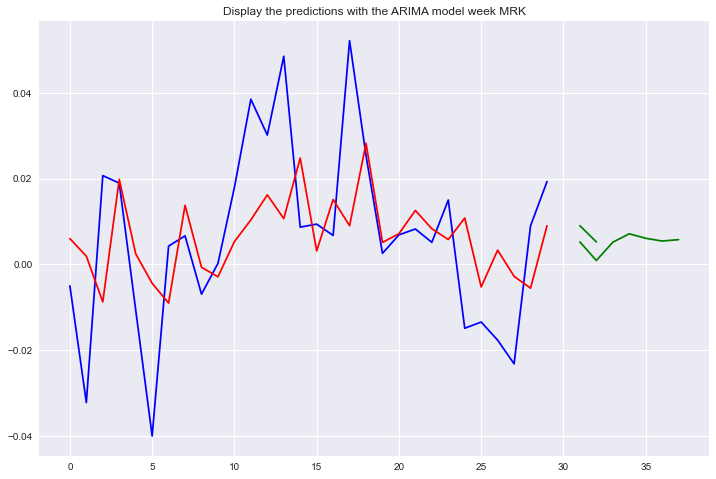

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  59.266
Date:                Sat, 18 Feb 2023   AIC                           -106.532
Time:                        17:13:11   BIC                            -98.125
Sample:                             0   HQIC                          -103.842
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.011      0.235      0.814      -0.020       0.025
ar.L1         -0.3833      0.695     -0.552      0.581      -1.745       0.979
ar.L2          0.1482      0.298      0.498      0.6

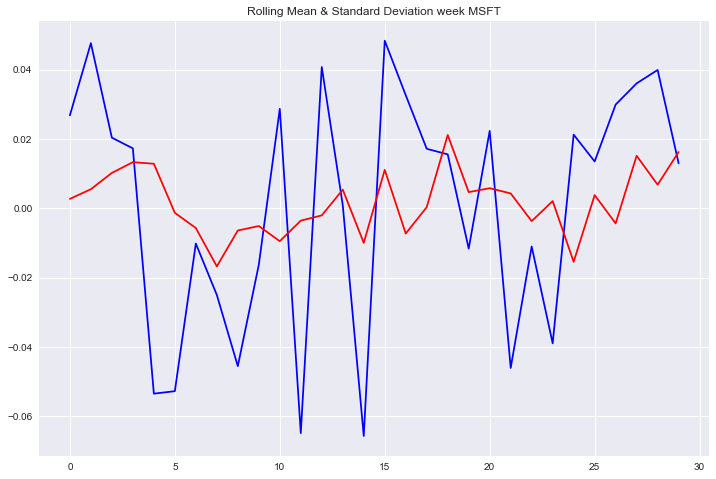

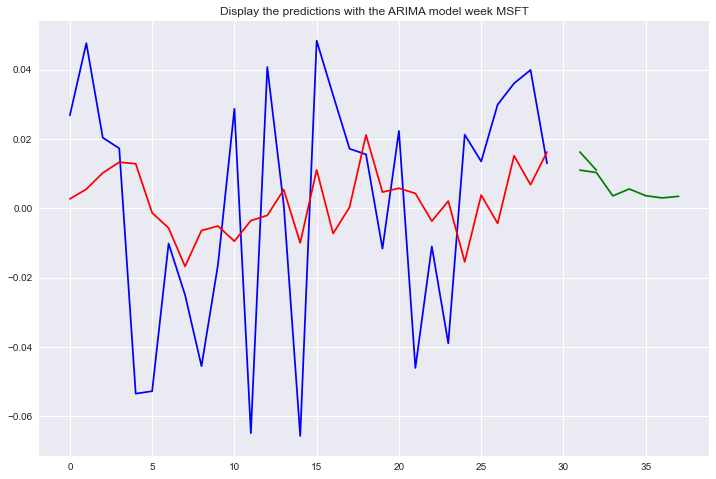

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  62.459
Date:                Sat, 18 Feb 2023   AIC                           -112.918
Time:                        17:13:12   BIC                           -104.511
Sample:                             0   HQIC                          -110.228
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.009      0.585      0.558      -0.012       0.022
ar.L1          1.2275      0.569      2.158      0.031       0.113       2.342
ar.L2         -0.2493      0.407     -0.613      0.5

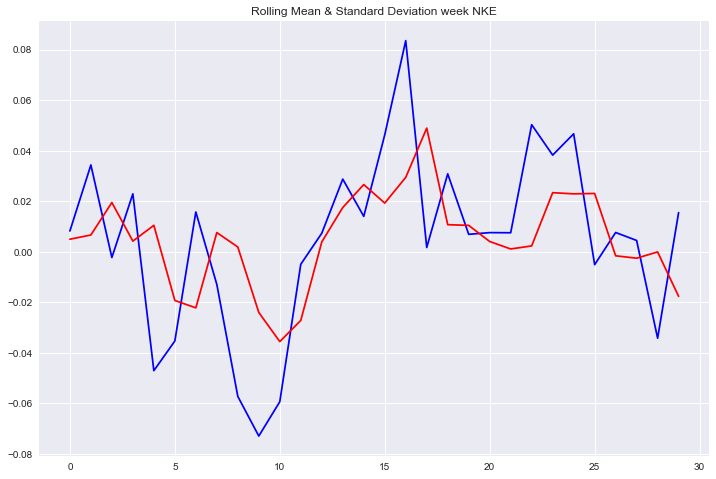

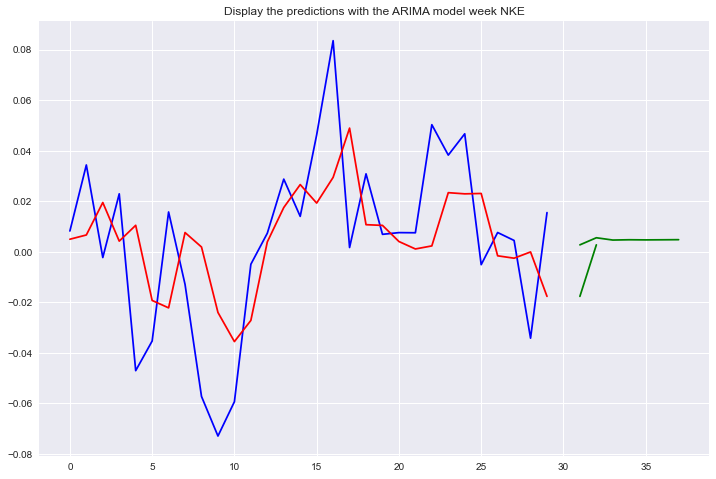

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  76.445
Date:                Sat, 18 Feb 2023   AIC                           -140.890
Time:                        17:13:12   BIC                           -132.483
Sample:                             0   HQIC                          -138.201
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.009      0.061      0.951      -0.017       0.018
ar.L1          0.2708      1.410      0.192      0.848      -2.493       3.035
ar.L2         -0.0321      0.907     -0.035      0.9

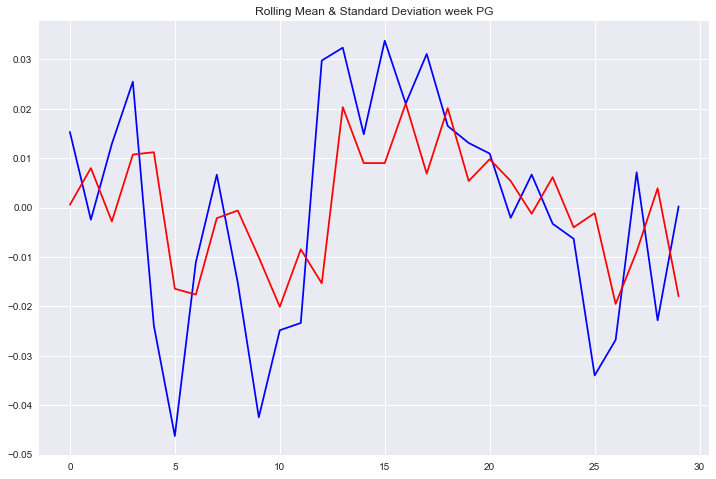

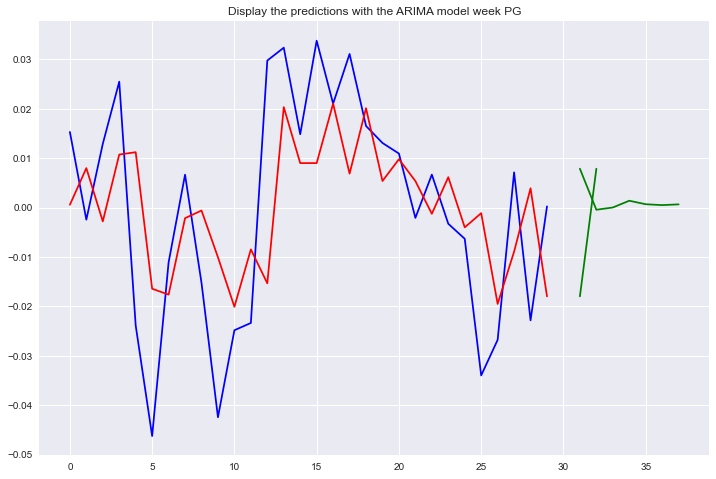

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  67.366
Date:                Sat, 18 Feb 2023   AIC                           -122.732
Time:                        17:13:13   BIC                           -114.325
Sample:                             0   HQIC                          -120.043
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.005      1.174      0.240      -0.004       0.016
ar.L1         -0.2810      1.961     -0.143      0.886      -4.125       3.563
ar.L2          0.0454      0.282      0.161      0.8

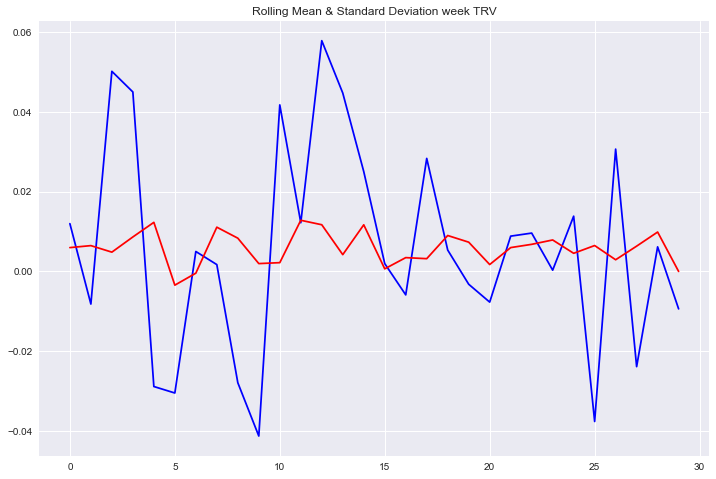

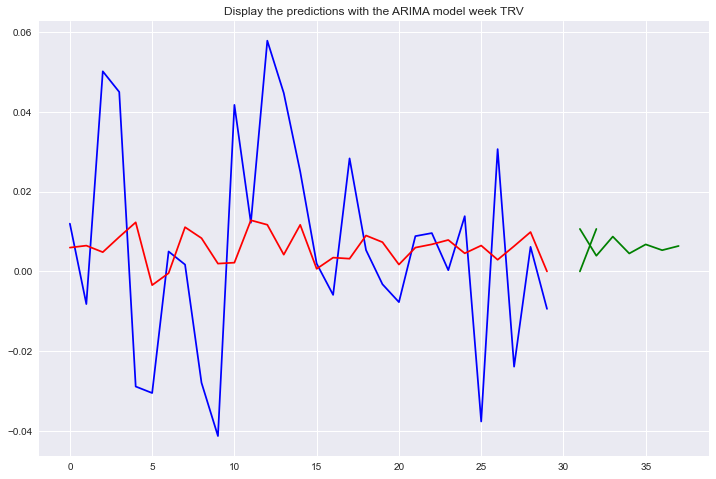

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  72.935
Date:                Sat, 18 Feb 2023   AIC                           -133.869
Time:                        17:13:14   BIC                           -125.462
Sample:                             0   HQIC                          -131.180
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.002     -0.838      0.402      -0.007       0.003
ar.L1          0.8794      0.374      2.350      0.019       0.146       1.613
ar.L2         -0.1219      0.225     -0.542      0.5

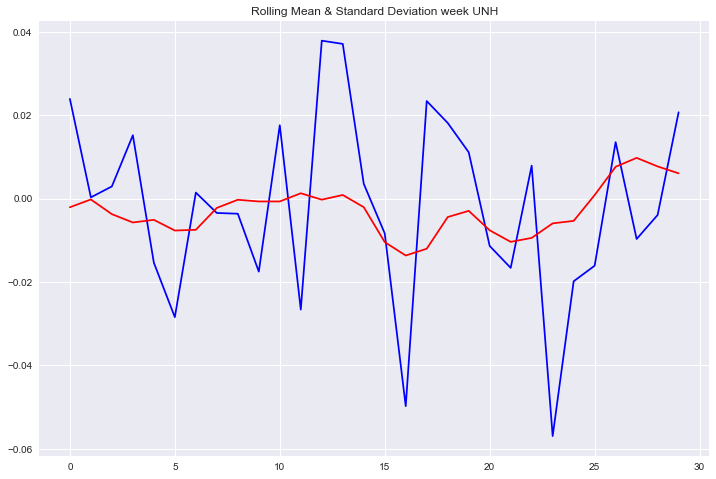

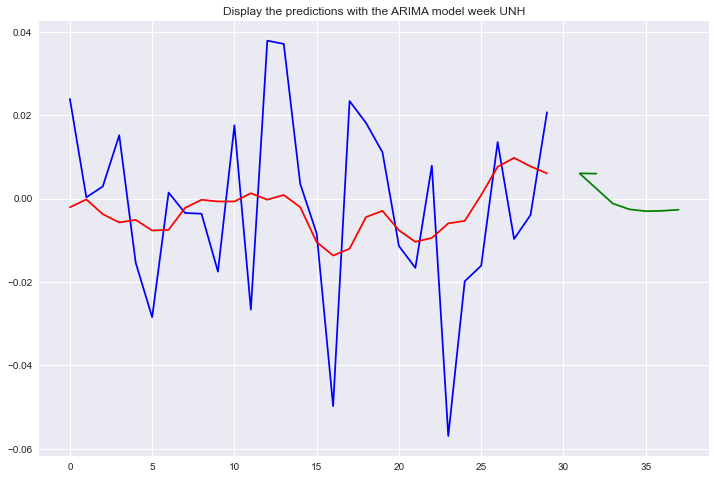

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  66.660
Date:                Sat, 18 Feb 2023   AIC                           -121.320
Time:                        17:13:15   BIC                           -112.913
Sample:                             0   HQIC                          -118.631
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.009      0.240      0.810      -0.016       0.020
ar.L1          0.1718      0.988      0.174      0.862      -1.765       2.109
ar.L2         -0.0519      0.270     -0.193      0.8

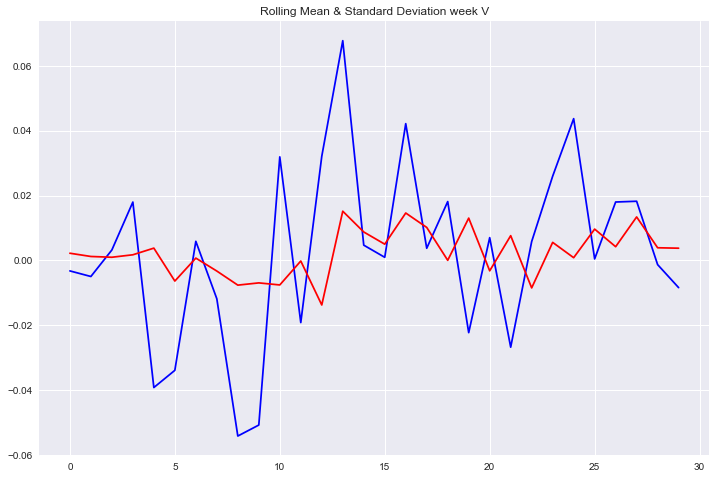

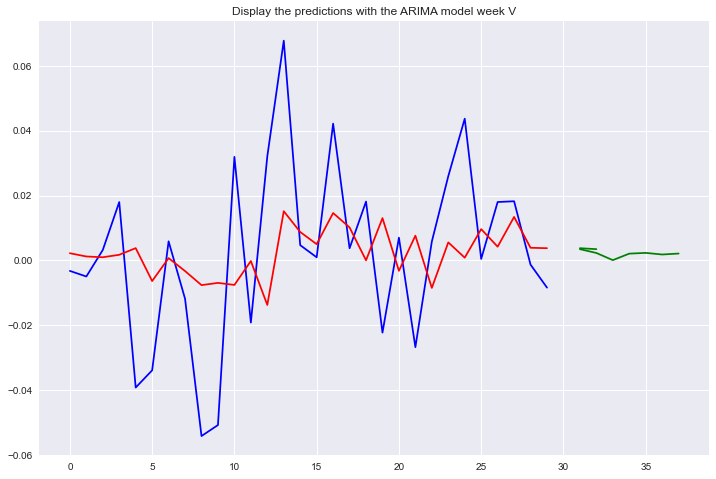

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  65.906
Date:                Sat, 18 Feb 2023   AIC                           -119.812
Time:                        17:13:16   BIC                           -111.405
Sample:                             0   HQIC                          -117.122
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0057      0.007     -0.802      0.423      -0.020       0.008
ar.L1          0.0832      2.833      0.029      0.977      -5.469       5.636
ar.L2          0.0411      0.471      0.087      0.9

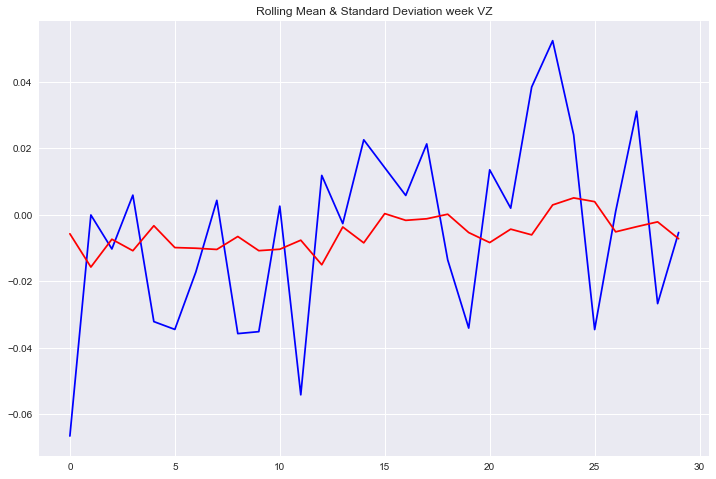

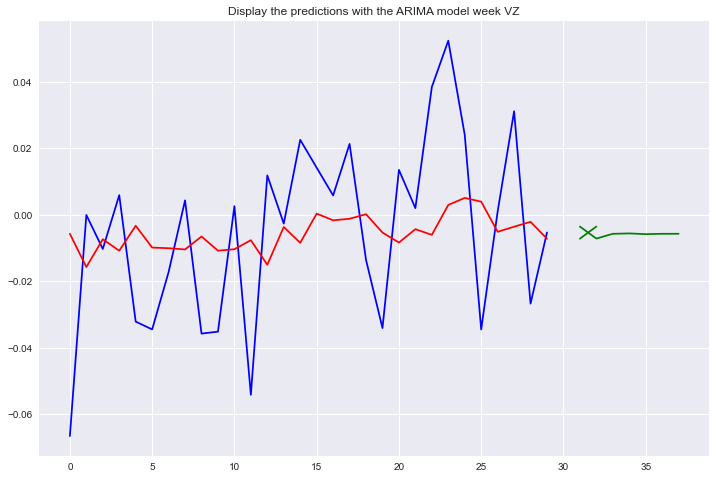

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  66.682
Date:                Sat, 18 Feb 2023   AIC                           -121.363
Time:                        17:13:17   BIC                           -112.956
Sample:                             0   HQIC                          -118.674
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.135e-05      0.012     -0.003      0.998      -0.023       0.023
ar.L1         -0.3754      0.304     -1.233      0.218      -0.972       0.221
ar.L2          0.3340      0.249      1.342      0.1

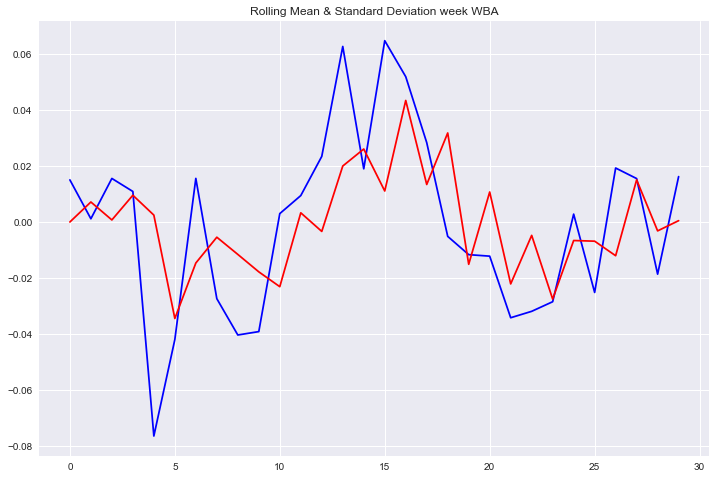

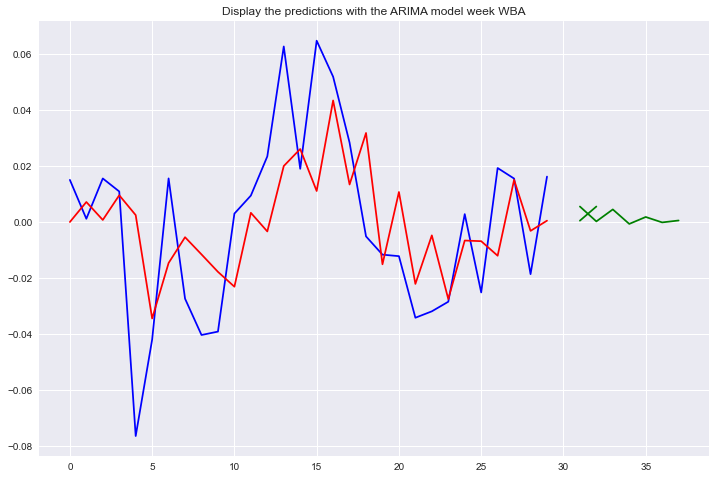

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  72.796
Date:                Sat, 18 Feb 2023   AIC                           -133.592
Time:                        17:13:18   BIC                           -125.185
Sample:                             0   HQIC                          -130.902
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.005      0.735      0.463      -0.006       0.014
ar.L1         -0.6402      0.992     -0.645      0.519      -2.585       1.304
ar.L2         -0.1006      0.376     -0.267      0.7

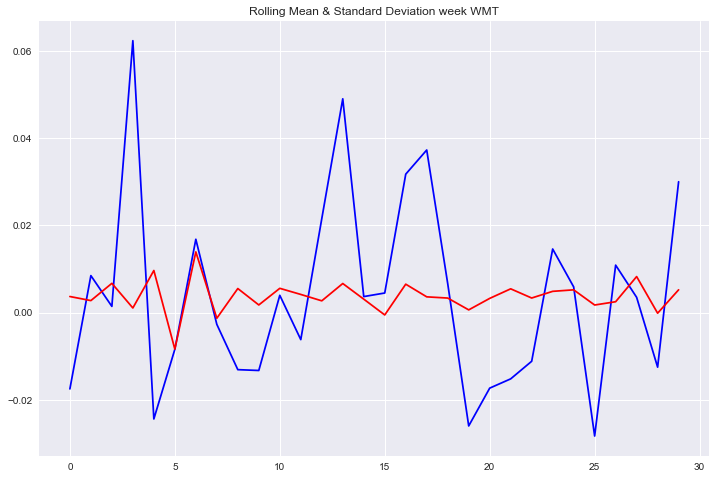

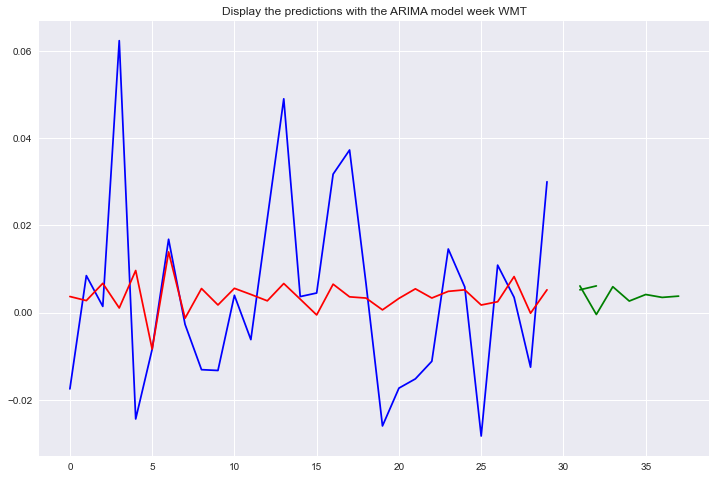

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

forcastlist2=[]

# the autocorrelation chart provides just the correlation at increasing lags
for h in range(len(udiff2.columns)):
    item2=udiff2.columns.__getitem__(h)
    # Notice that you have to use udiff - the differenced data rather than the original data. 
    # ar1 = # TODO: Fit an ARIMA model to the differenced data
    ar12='{}'.format(item2)
    ar12 = ARIMA(udiff2[item2].values,order=(3,0,1)).fit()
    print(ar12)
    print(ar12.summary())
    
    # TODO: Plot the ARMA fitted values on the same plot as the differenced time series
    plt.figure(figsize=(12,8))
    plt.plot(udiff2[item2].values,color='blue')
    preds=ar12.fittedvalues
    jo2='Rolling Mean & Standard Deviation {}'.format(item2)
    plt.title(jo2)
    plt.plot(preds,color='red')
    plt.show()
    
    #forecast = # TODO: Use the ARMA model to create a forecast two weeks into the future
    
    steps=7

    forecast=ar12.forecast(steps=steps)
    
    forcastlist2.append(forecast)

    plt.figure(figsize=(12, 8))
    plt.plot(udiff2[item2].values, color='blue')

    preds = ar12.fittedvalues
    plt.plot(preds, color='red')

    plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(udiff2[item2].values)+1, len(udiff2[item2].values)+3)), color='green')
    plt.plot(pd.DataFrame(forecast,index=range(len(udiff2[item2].values)+1, len(udiff2[item2].values)+1+steps)), color='green')
    jos='Display the predictions with the ARIMA model {}'.format(item2)
    plt.title(jos)
    plt.show()

In [22]:
udiff2.columns

Index(['week AAPL', 'week AMGN', 'week AXP', 'week BA', 'week CAT', 'week CRM',
       'week CSCO', 'week CVX', 'week DIS', 'week DOW', 'week GS', 'week HD',
       'week HON', 'week IBM', 'week INTC', 'week JNJ', 'week JPM', 'week KO',
       'week MCD', 'week MMM', 'week MRK', 'week MSFT', 'week NKE', 'week PG',
       'week TRV', 'week UNH', 'week V', 'week VZ', 'week WBA', 'week WMT'],
      dtype='object')

week AAPL
           0
31  0.002913
32  0.001115
33  0.001017
34  0.000935
35  0.000865
36  0.000844
37  0.000841


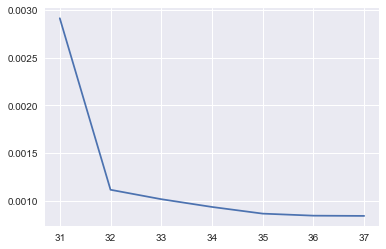

week AMGN
           0
31  0.003610
32  0.013535
33  0.016717
34  0.018901
35  0.018034
36  0.016060
37  0.012991


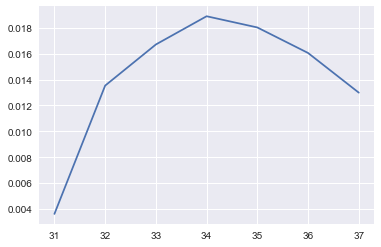

week AXP
           0
31  0.012493
32  0.006372
33  0.007093
34  0.007574
35  0.006755
36  0.007147
37  0.007055


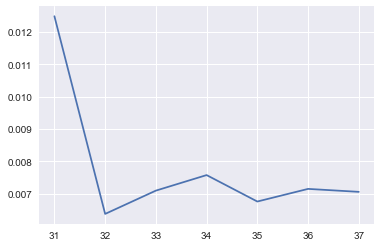

week BA
           0
31  0.012850
32  0.010558
33  0.012548
34  0.010444
35  0.011798
36  0.010734
37  0.011369


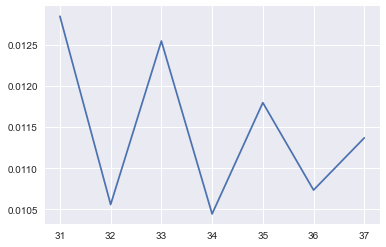

week CAT
           0
31 -0.005470
32  0.004098
33  0.006396
34  0.006550
35  0.008811
36  0.009762
37  0.009831


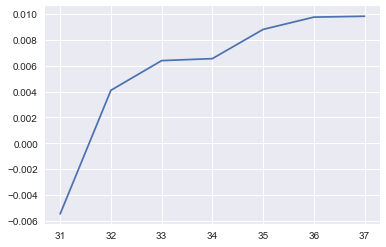

week CRM
           0
31  0.006324
32 -0.001872
33 -0.001651
34 -0.000036
35 -0.001444
36 -0.001214
37 -0.001037


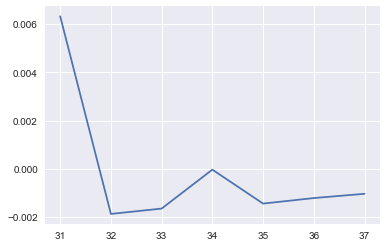

week CSCO
           0
31  0.015244
32 -0.008644
33  0.013604
34  0.008389
35 -0.000020
36  0.006988
37  0.006048


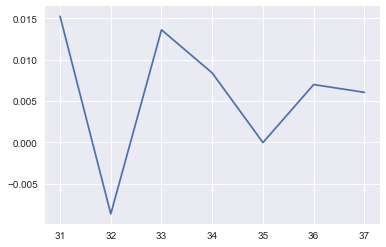

week CVX
           0
31 -0.006297
32  0.005063
33  0.003639
34  0.003805
35  0.005841
36  0.005502
37  0.005467


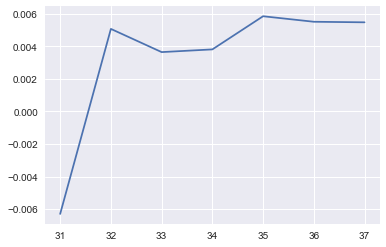

week DIS
           0
31 -0.009202
32  0.004745
33  0.003108
34  0.001252
35  0.001508
36  0.001783
37  0.001747


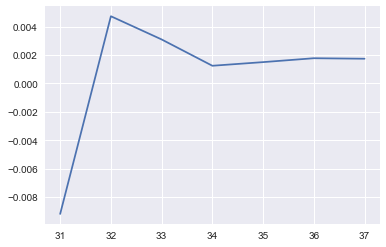

week DOW
           0
31  0.001502
32  0.004484
33  0.002816
34  0.005016
35  0.005124
36  0.005072
37  0.005452


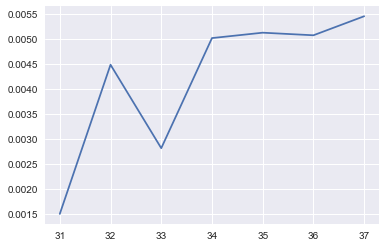

week GS
           0
31  0.005834
32  0.005713
33  0.005756
34  0.005953
35  0.005982
36  0.006008
37  0.006021


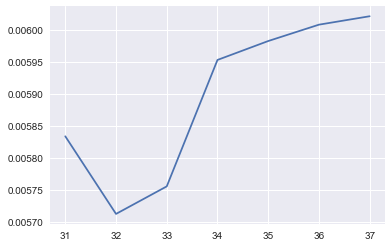

week HD
           0
31  0.010935
32 -0.000939
33  0.000596
34  0.004633
35  0.002242
36  0.002138
37  0.003170


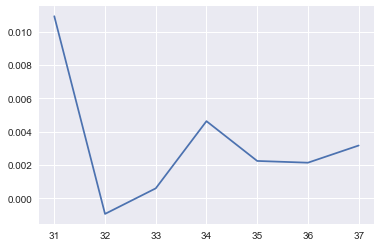

week HON
           0
31 -0.005769
32  0.001033
33  0.000328
34  0.003640
35  0.003191
36  0.004828
37  0.004550


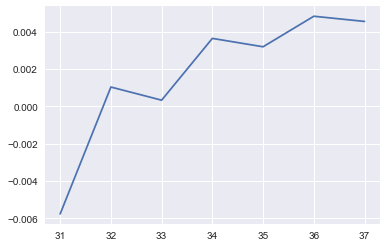

week IBM
           0
31  0.004418
32  0.002958
33  0.002800
34  0.002543
35  0.002452
36  0.002426
37  0.002412


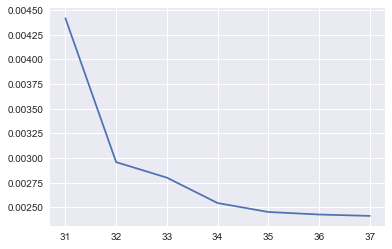

week INTC
           0
31 -0.008816
32 -0.009766
33 -0.009142
34 -0.010409
35 -0.010425
36 -0.010522
37 -0.010653


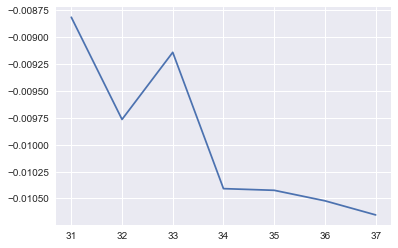

week JNJ
           0
31 -0.010953
32 -0.004975
33 -0.004900
34 -0.004680
35 -0.003323
36 -0.003073
37 -0.003003


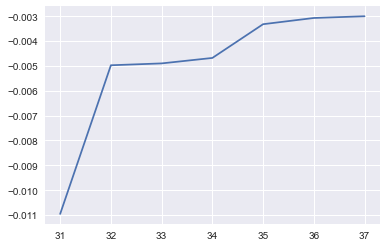

week JPM
           0
31  0.007784
32  0.007218
33  0.007948
34  0.008401
35  0.008825
36  0.009051
37  0.009131


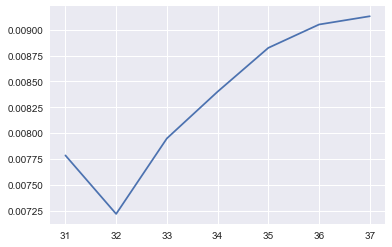

week KO
           0
31 -0.007215
32  0.000756
33 -0.002647
34  0.000035
35 -0.000713
36 -0.000246
37 -0.000149


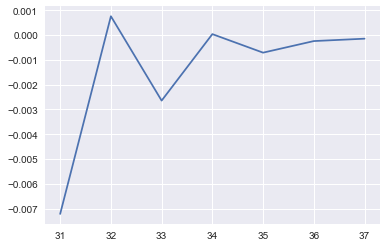

week MCD
           0
31  0.008665
32  0.008425
33  0.005590
34  0.002950
35  0.000977
36  0.000092
37  0.000148


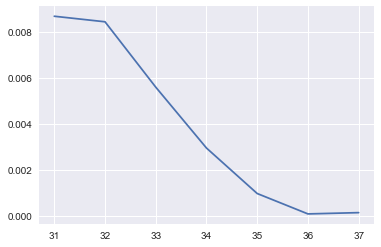

week MMM
           0
31  0.008136
32  0.001333
33 -0.003139
34 -0.001482
35 -0.000969
36 -0.001735
37 -0.001876


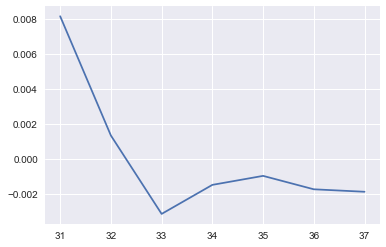

week MRK
           0
31  0.005242
32  0.000902
33  0.005171
34  0.007134
35  0.006088
36  0.005445
37  0.005775


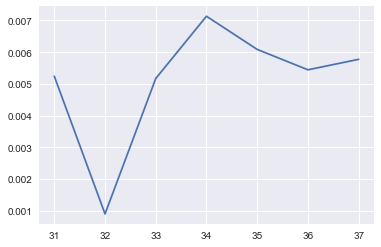

week MSFT
           0
31  0.011008
32  0.010321
33  0.003578
34  0.005569
35  0.003635
36  0.002991
37  0.003447


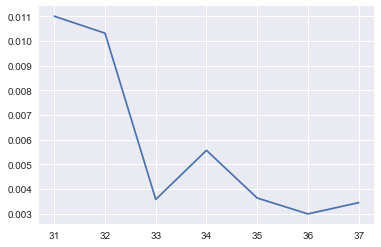

week NKE
           0
31  0.002760
32  0.005568
33  0.004658
34  0.004775
35  0.004721
36  0.004763
37  0.004810


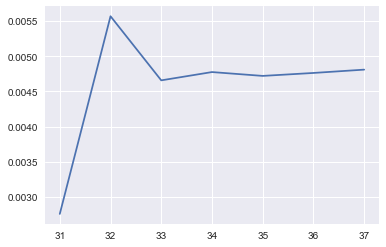

week PG
           0
31  0.007853
32 -0.000448
33  0.000009
34  0.001375
35  0.000668
36  0.000491
37  0.000641


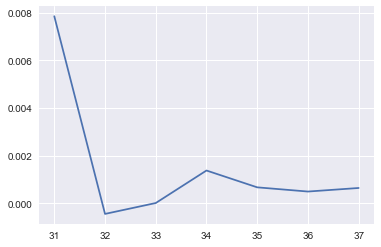

week TRV
           0
31  0.010644
32  0.003925
33  0.008726
34  0.004491
35  0.006764
36  0.005315
37  0.006371


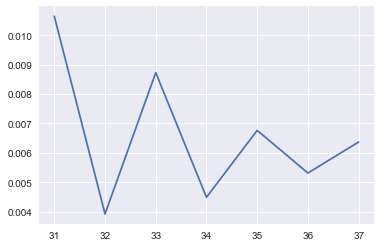

week UNH
           0
31  0.005981
32  0.002398
33 -0.001185
34 -0.002567
35 -0.003022
36 -0.002929
37 -0.002668


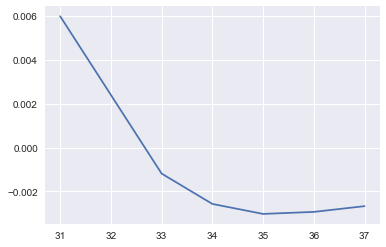

week V
           0
31  0.003470
32  0.002291
33  0.000084
34  0.002088
35  0.002316
36  0.001819
37  0.002114


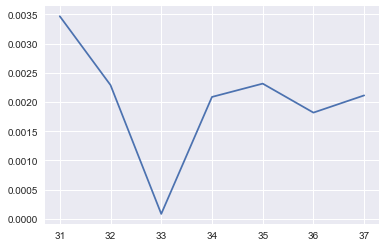

week VZ
           0
31 -0.003570
32 -0.007183
33 -0.005745
34 -0.005634
35 -0.005847
36 -0.005748
37 -0.005740


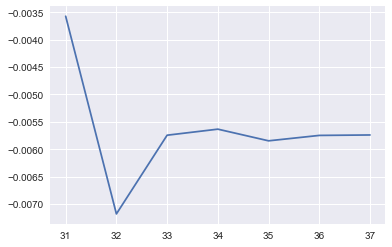

week WBA
           0
31  0.005501
32  0.000177
33  0.004465
34 -0.000720
35  0.001764
36 -0.000180
37  0.000508


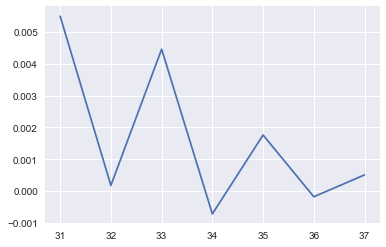

week WMT
           0
31  0.006131
32 -0.000417
33  0.005953
34  0.002661
35  0.004162
36  0.003498
37  0.003790


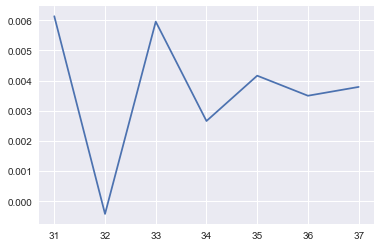

In [23]:
for forc2 in range(len(udiff2.columns)):
    forcr=udiff2.columns.__getitem__(forc2)
    l=pd.DataFrame(forcastlist2[forc2],index=range(len(udiff2[forcr].values)+1, len(udiff2[forcr].values)+1+steps))
    item=udiff2.columns.__getitem__(forc2)
    # Notice that you have to use udiff - the differenced data rather than the original data. 
    # ar1 = # TODO: Fit an ARIMA model to the differenced data
    ar1='{}'.format(item)
    print(ar1)
    print(l)
    plt.figure()
    plt.plot(l)
    plt.show()

In [24]:
listaDOWJONES=[]
for ar in range(len(forcastlist2)):
    item2=udiff2.columns.__getitem__(ar)
    arnasdaq='{}'.format(item2)
    fi=forcastlist2[ar][0]
    fm=forcastlist2[ar][1]
    ff=forcastlist2[ar][6]
    if ff>fi:
        listaDOWJONES.append(item2)
        print('Invierte en: ', arnasdaq)

Invierte en:  week AMGN
Invierte en:  week CAT
Invierte en:  week CVX
Invierte en:  week DIS
Invierte en:  week DOW
Invierte en:  week GS
Invierte en:  week HON
Invierte en:  week JNJ
Invierte en:  week JPM
Invierte en:  week KO
Invierte en:  week MRK
Invierte en:  week NKE


In [26]:
LISTAEMISORAS_DOWJONES=[]
for i in listaDOWJONES:
    wd = i.split()
    LISTAEMISORAS_DOWJONES.append(wd[1])
LISTAEMISORAS_DOWJONES

['AMGN',
 'CAT',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HON',
 'JNJ',
 'JPM',
 'KO',
 'MRK',
 'NKE']

In [27]:
data_final_DOWJONES=pd.DataFrame(LISTAEMISORAS_DOWJONES, columns=['DOWJONES'])
data_final_DOWJONES

DOWJONES
0      AMGN
1       CAT
2       CVX
3       DIS
4       DOW
5        GS
6       HON
7       JNJ
8       JPM
9        KO
10      MRK
11      NKE

In [28]:
# Enviamos la data a excel
data_final_DOWJONES.to_excel('data_final_DOWJONES.xlsx')